# Cross-Sell Insurance

### Problem Statement:
A consumer bank with a range of products would like to cross-sell insurance to its consumer base (that is, cross-sell the personal protection insurance (PPI) product to those customers who have a secured or unsecured type of loan, but no PPI product as yet). 
Attached is a sample data set from their customer portfolio containing various fields about their product ownership, credit standing, outstanding amounts, and whether they already have an insurance product (called as PPI / personal protection insurance), if any, the type of PPI product they own.
The bank would like to adopt analytics driven approach applied on this sample data for deciding:
-	Who should they target from the pool of customers that currently do not have a PPI, and 
-	What type of PPI product they should be targeting them with..


### Importing necessary libraries

In [727]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ignoring warnings
import warnings
warnings.filterwarnings("ignore")


# Setting display parameters
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",200)
pd.set_option("display.float_format","{:.4f}".format)

### Importing the data

In [728]:
# Importing the dataset and displaying top 5 columns

df= pd.read_excel("PPI_Dataset.xlsx")
df.head()

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,Residential_Status,Telephone_Indicator,Number_of_Dependants,Marital_Status,Gender,Time_in_Employment,Employment_Status,Full_Part_Time_Empl_Ind,Perm_Temp_Empl_Ind,Income_Range,Current_Account,ACCESS_Card,VISA_Card,American_Express,Diners_Card,Cheque_Guarantee,Other_Credit_Store_Card,Time_with_Bank,Value_of_Property,Outstanding_Mortgage_Bal,Total_Outstanding_Balances,Bureau_Data___Monthly_Other_Co_R,Worst_History_CT,Payment_Method,Age,Total_outstanding_balance__mortg,Total___Public_Info___CCJ____ban,Total_value__Public_Info___CCJ__,Time_since_most_recent_Public_In,Total_value__CAIS_8_9s,Worst_status_L6m,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Bankruptcy_Detected__SP_,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,CIFAS_detected,Time_since_most_recent_outstandi,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI
0,1,918,A,36,3000.0000,14.4000,UnSecured,46,8,132,H,Y,0,M,M,288,S,F,P,6,TRUE,False,False,False,False,TRUE,True,168,178000,47679,64406,513,5,D,46,64,1,5,16,0,0,0,0,9,10,N,1,18,6,N,16,NaN,0,NaN,NaN,NaN,0,0,0
1,3,903,A,120,21000.0000,7.9000,secured,16,3,288,H,Y,0,S,F,37,R,P,P,2,TRUE,False,True,False,False,TRUE,False,300,180000,11563,31614,331,5,D,59,13,0,0,99,0,1,0,0,6,22,N,0,203,8,N,99,Life & Critical Illn,1,748.0000,LIFE & CRITICAL ILLNESS,LCI,0,0,1
2,4,1060,X,78,7200.0000,7.9000,secured,17,3,276,H,Y,0,M,M,154,P,F,P,5,TRUE,False,True,False,False,TRUE,False,369,199000,17563,26045,413,0,D,56,19,2,30,50,266,0,0,0,1,21,N,1,87,7,N,50,Joint,1,719.0000,LASCI JOINT,Joint,0,1,0
3,6,839,B,60,8000.0000,16.9000,UnSecured,47,8,48,R,Y,0,M,M,82,G,F,P,6,TRUE,False,True,False,False,TRUE,False,216,120000,0,181217,1112,5,D,33,160,0,0,99,1,1,0,0,5,0,N,0,229,9,N,99,Life & Critical Illn,1,748.0000,LIFE & CRITICAL ILLNESS,LCI,0,0,1
4,7,1057,X,60,7650.0000,7.4000,UnSecured,55,10,156,H,Y,2,M,M,342,S,F,P,6,TRUE,True,False,False,False,TRUE,False,510,180000,60101,63811,435,0,D,49,62,0,0,99,0,0,0,0,1,13,N,0,38,6,N,99,Single,1,718.0000,LASCI,Single,1,0,0


### Exploratory Data Analysis

In [729]:
# Checking the shape of the data

df.shape

(16383, 59)

So, we have 16383 rows and 59 columns/variables

In [730]:
# CHecking the basic information of the data like it's data type index values etc..

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 59 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ref                               16383 non-null  int64  
 1   Credit_Score                      16383 non-null  int64  
 2   Final_Grade                       16383 non-null  object 
 3   Term                              16383 non-null  int64  
 4   Net_Advance                       16383 non-null  float64
 5   APR                               16383 non-null  float64
 6   Loan_Type                         16383 non-null  object 
 7   Mosaic                            16383 non-null  int64  
 8   Mosaic_Class                      16383 non-null  int64  
 9   Time_at_Address                   16383 non-null  int64  
 10  Residential_Status                16383 non-null  object 
 11  Telephone_Indicator               16383 non-null  object 
 12  Numb

In [731]:
# Checking the basic summary statistic of the numerical variables

df.describe()

,Ref,Credit_Score,Term,Net_Advance,APR,Mosaic,Mosaic_Class,Time_at_Address,Number_of_Dependants,Time_in_Employment,Income_Range,Time_with_Bank,Value_of_Property,Outstanding_Mortgage_Bal,Total_Outstanding_Balances,Bureau_Data___Monthly_Other_Co_R,Worst_History_CT,Age,Total_outstanding_balance__mortg,Total___Public_Info___CCJ____ban,Total_value__Public_Info___CCJ__,Time_since_most_recent_Public_In,Total_value__CAIS_8_9s,Worst_status_L6m,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,Time_since_most_recent_outstandi,PPI,code,PPI_SINGLE,PPI_JOINT,PPI_LCI
count,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,16383.0000,9405.0000,16383.0000,16383.0000,16383.0000
mean,21168.6953,882.0618,59.1429,7364.0078,18.7546,29.4197,5.3527,120.4881,0.8085,103.0961,4.4087,194.4911,166366.3013,70060.9648,78214.2424,601.9420,2.6926,44.1005,64.9616,0.2056,5.0112,90.1823,18.5797,0.7986,0.4828,0.3265,2.9177,6.5727,0.1576,137.7936,5.9847,91.6973,0.5775,743.3032,0.3823,0.0748,0.1204
std,12142.7975,93.1496,26.6891,6673.3436,9.6625,16.7190,5.1303,109.1922,1.1189,91.5420,1.6689,107.1447,118720.9494,83027.7279,89423.5016,614.0706,2.3813,10.8864,82.0415,0.6298,42.6096,23.6451,63.0962,1.2966,1.1380,1.2547,2.3981,7.4491,0.5409,145.9360,2.6692,22.0923,0.4940,24.2838,0.4860,0.2630,0.3254
min,1.0000,352.0000,6.0000,500.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,-21.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,0.0000,0.0000,-1.0000,0.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,0.0000,517.0000,0.0000,0.0000,0.0000
25%,10699.0000,818.0000,48.0000,3000.0000,9.9000,16.0000,3.0000,38.0000,0.0000,38.0000,3.0000,120.0000,120000.0000,0.0000,9255.5000,112.5000,0.0000,36.0000,0.0000,0.0000,0.0000,99.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,34.0000,4.0000,99.0000,0.0000,716.0000,0.0000,0.0000,0.0000
50%,21303.0000,882.0000,60.0000,5300.0000,16.9000,25.0000,4.0000,84.0000,0.0000,72.0000,5.0000,181.0000,125000.0000,60000.0000,59430.0000,496.0000,4.0000,44.0000,48.0000,0.0000,0.0000,99.0000,0.0000,0.0000,0.0000,0.0000,2.0000,4.0000,0.0000,93.0000,6.0000,99.0000,1.0000,756.0000,0.0000,0.0000,0.0000
75%,31689.0000,947.0000,60.0000,9000.0000,24.9000,44.0000,8.0000,180.0000,1.0000,144.0000,6.0000,252.0000,190000.0000,107698.5000,118656.0000,893.0000,5.0000,51.0000,104.0000,0.0000,0.0000,99.0000,8.0000,1.0000,0.0000,0.0000,4.0000,10.0000,0.0000,194.0000,9.0000,99.0000,1.0000,759.0000,1.0000,0.0000,0.0000
max,42072.0000,1295.0000,300.0000,75000.0000,50.4000,99.0000,99.0000,864.0000,30.0000,600.0000,6.0000,756.0000,3300000.0000,3505442.0000,1876225.0000,8942.0000,6.0000,77.0000,999.0000,9.0000,999.0000,99.0000,999.0000,6.0000,6.0000,9.0000,9.0000,34.0000,9.0000,999.0000,9.0000,99.0000,1.0000,779.0000,1.0000,1.0000,1.0000


Looks like we have some outliers as there is rise from 75% to max data. 
For instance Dependants number 30 which is quite abnormal. 

In [732]:
# Checking summary statistics for categorical data

cat_s = df.describe(include = ['object']).T.sort_values(by = 'unique')
print(len(cat_s))
cat_s

17


,count,unique,top,freq
Perm_Temp_Empl_Ind,16383,2,P,16361
Loan_Type,16383,2,UnSecured,13054
Telephone_Indicator,16383,2,Y,15241
Gender,16383,2,M,9770
Full_Part_Time_Empl_Ind,16383,2,F,16308
Cheque_Guarantee,16383,2,TRUE,14659
Current_Account,16383,2,TRUE,16351
CIFAS_detected,16383,3,N,16292
Bankruptcy_Detected__SP_,16383,3,N,16351
Payment_Method,16383,3,D,16308


In [733]:
# Checking for skewness of the data

df.skew().sort_values()

Time_since_most_recent_outstandi   -2.9248
Time_since_most_recent_Public_In   -2.5501
code                               -1.5194
VISA_Card                          -1.0813
Income_Range                       -0.9064
Total___of_accounts                -0.3735
PPI                                -0.3138
Worst_History_CT                   -0.1929
Credit_Score                       -0.0676
Ref                                -0.0183
Mosaic                              0.0954
Age                                 0.1924
PPI_SINGLE                          0.4842
Time_with_Bank                      0.6294
APR                                 0.8766
Searches___Total___L6m              0.9507
Years_on_ER_for_SP                  1.3421
Time_at_Address                     1.3932
Other_Credit_Store_Card             1.4393
ACCESS_Card                         1.4632
Time_in_Employment                  1.5019
Term                                1.5283
Total_outstanding_balance___excl    1.9870
Bureau_Data

In [734]:
# CHecking if there are any duplicate dat

df[df.duplicated(keep="first")]

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,Residential_Status,Telephone_Indicator,Number_of_Dependants,Marital_Status,Gender,Time_in_Employment,Employment_Status,Full_Part_Time_Empl_Ind,Perm_Temp_Empl_Ind,Income_Range,Current_Account,ACCESS_Card,VISA_Card,American_Express,Diners_Card,Cheque_Guarantee,Other_Credit_Store_Card,Time_with_Bank,Value_of_Property,Outstanding_Mortgage_Bal,Total_Outstanding_Balances,Bureau_Data___Monthly_Other_Co_R,Worst_History_CT,Payment_Method,Age,Total_outstanding_balance__mortg,Total___Public_Info___CCJ____ban,Total_value__Public_Info___CCJ__,Time_since_most_recent_Public_In,Total_value__CAIS_8_9s,Worst_status_L6m,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Bankruptcy_Detected__SP_,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,CIFAS_detected,Time_since_most_recent_outstandi,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI


We don't have any duplicates

In [735]:
# Keeping a copy of original data

df_copy = df.copy()

### Data Preparation

#### Dropping unnecessary variables

- Dropping column "ref" as it has unique values and we are not anly
-  We will also drop columns 'Insurance_Description', 'prdt_desc' as they have similar data

In [736]:
df = df.drop(['Ref','Insurance_Description','prdt_desc'],axis=1)
df.shape

(16383, 56)

Now we have 56 variables

#### Checking for missing values

In [737]:
(df.isnull().sum()/len(df))*100

Credit_Score                        0.0000
Final_Grade                         0.0000
Term                                0.0000
Net_Advance                         0.0000
APR                                 0.0000
Loan_Type                           0.0000
Mosaic                              0.0000
Mosaic_Class                        0.0000
Time_at_Address                     0.0000
Residential_Status                  0.0000
Telephone_Indicator                 0.0000
Number_of_Dependants                0.0000
Marital_Status                      0.0000
Gender                              0.0000
Time_in_Employment                  0.0000
Employment_Status                   0.0000
Full_Part_Time_Empl_Ind             0.0000
Perm_Temp_Empl_Ind                  0.0000
Income_Range                        0.0000
Current_Account                     0.0000
ACCESS_Card                         0.0000
VISA_Card                           0.0000
American_Express                    0.0000
Diners_Card

So we have around 43% of missing values in columns - 'code' and 'category'.
Since code is continuous variable and we have large amount of missing values and imputing them will result in biased results. So,we will drop this variable.

And we already have dummy variables for category so we can drop that too.


In [738]:
# Dropping "code" as it has high percentage of missing values

df.drop(["code","category"],axis=1,inplace=True)
df.shape

(16383, 54)

### Univariate analysis of numeric variables and treating outliers

In [739]:
ncols = df.select_dtypes(include=np.number).columns
print(len(ncols))
ncols

35


Index(['Credit_Score', 'Term', 'Net_Advance', 'APR', 'Mosaic', 'Mosaic_Class',
       'Time_at_Address', 'Number_of_Dependants', 'Time_in_Employment',
       'Income_Range', 'Time_with_Bank', 'Value_of_Property',
       'Outstanding_Mortgage_Bal', 'Total_Outstanding_Balances',
       'Bureau_Data___Monthly_Other_Co_R', 'Worst_History_CT', 'Age',
       'Total_outstanding_balance__mortg', 'Total___Public_Info___CCJ____ban',
       'Total_value__Public_Info___CCJ__', 'Time_since_most_recent_Public_In',
       'Total_value__CAIS_8_9s', 'Worst_status_L6m', 'Worst_CUrrent_Status',
       '__of_status_3_s_L6m', 'Searches___Total___L6m', 'Years_on_ER_for_SP',
       'Total___outstanding_CCJ_s', 'Total_outstanding_balance___excl',
       'Total___of_accounts', 'Time_since_most_recent_outstandi', 'PPI',
       'PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI'],
      dtype='object')

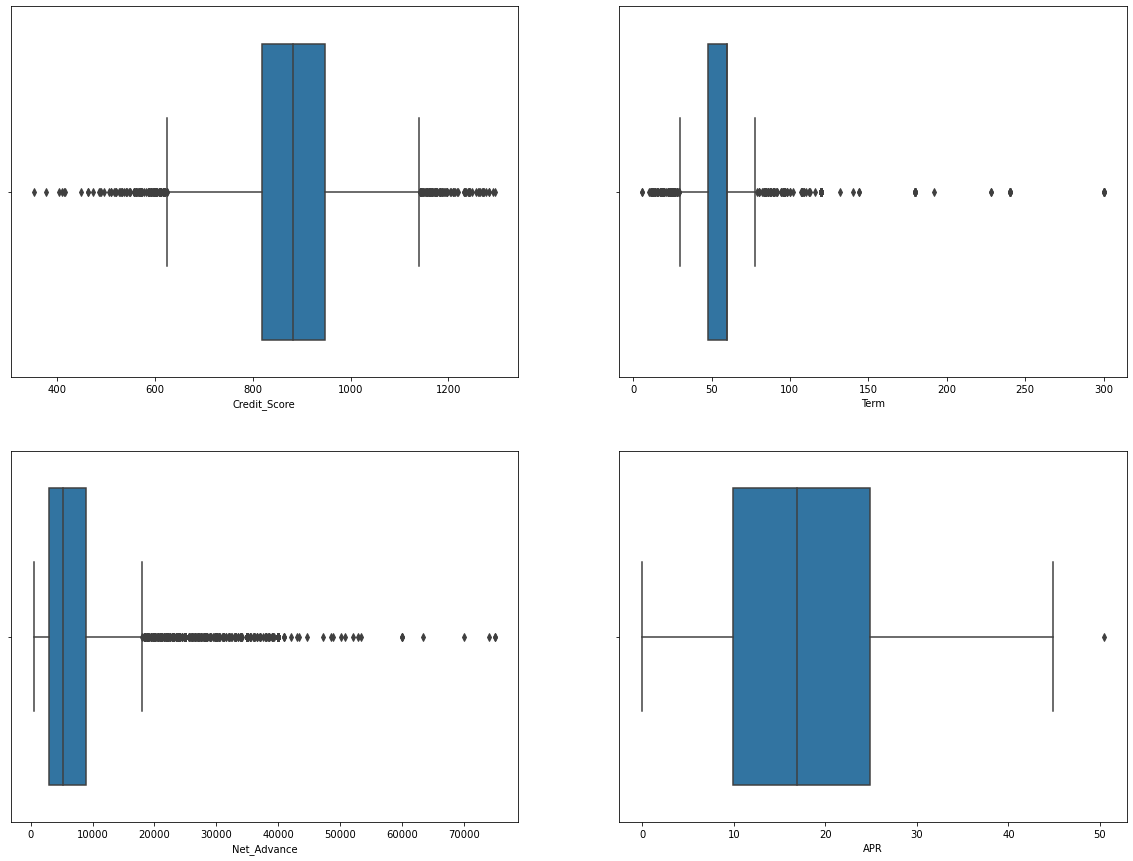

In [740]:
cols = ['Credit_Score', 'Term','Net_Advance','APR']

plt.figure(figsize = (20, 15))

for i in enumerate(cols):
    plt.subplot(len(cols)//2, 2, i[0]+1)
    sns.boxplot(x = i[1], data = df,hue=df.PPI)
plt.show()

### Observations on Credit Score
- Average credit score is 900 Min credit score is 350 and max is 1300
- It doesn't look like w ehave outliers here.
- Since we have so many values to analyze we will create bins for credit score and analyze further

In [741]:
# Creating bin for credit score

df['Credit_Score_bin'] = (pd.cut(df['Credit_Score'], bins = 15, precision = 0)
                               .apply(lambda x: str(x.left) + '-' + str(x.right)))

In [742]:
df.Credit_Score.describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   16383.0000
mean      882.0618
std        93.1496
min       352.0000
5%        744.0000
25%       818.0000
50%       882.0000
75%       947.0000
90%      1003.0000
95%      1029.0000
99%      1082.0000
max      1295.0000
Name: Credit_Score, dtype: float64

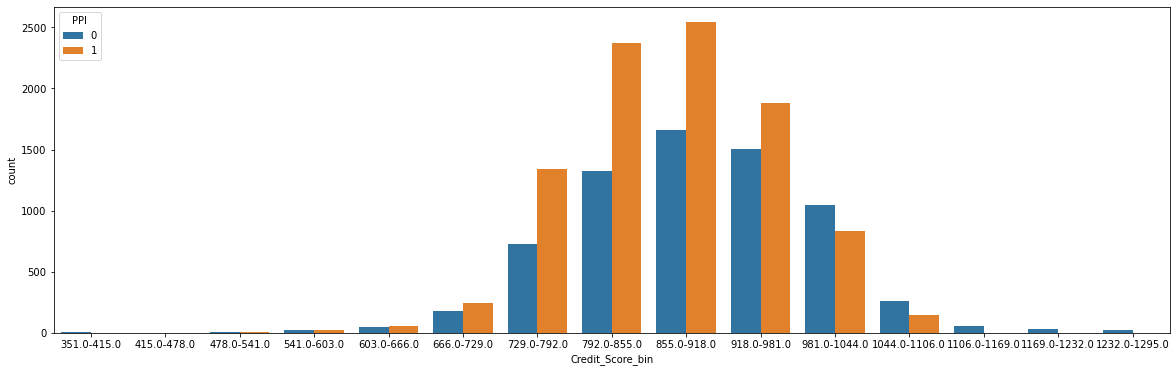

In [743]:
plt.figure(figsize=(20,6))
sns.countplot(df["Credit_Score_bin"],data=df,hue="PPI");

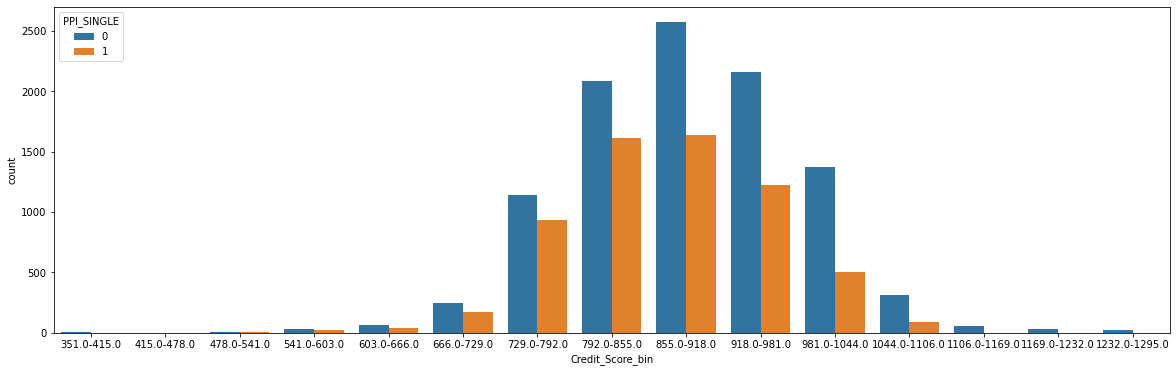

In [744]:
# Credit_Score_bin with hue PPI_SINGLE

plt.figure(figsize=(20,6))
sns.countplot(df["Credit_Score_bin"],data=df,hue="PPI_SINGLE");

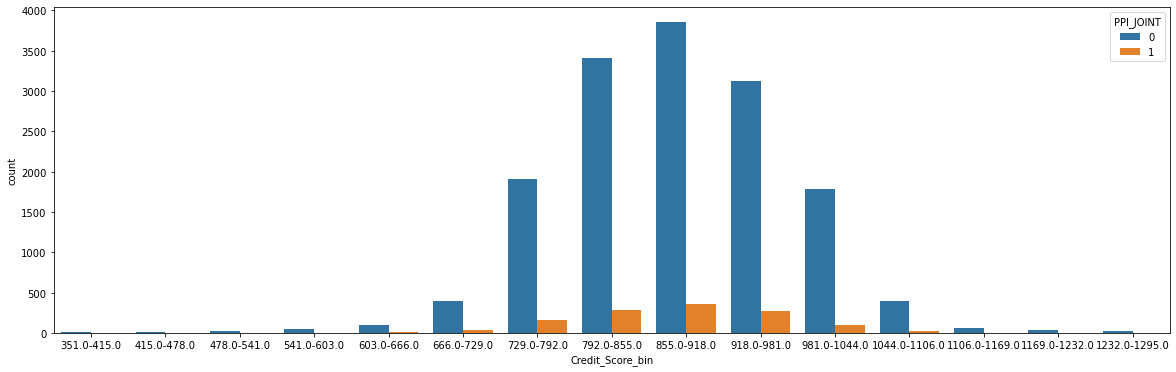

In [745]:
# Credit_Score_bin with hue PPI_JOINT

plt.figure(figsize=(20,6))
sns.countplot(df["Credit_Score_bin"],data=df,hue="PPI_JOINT");

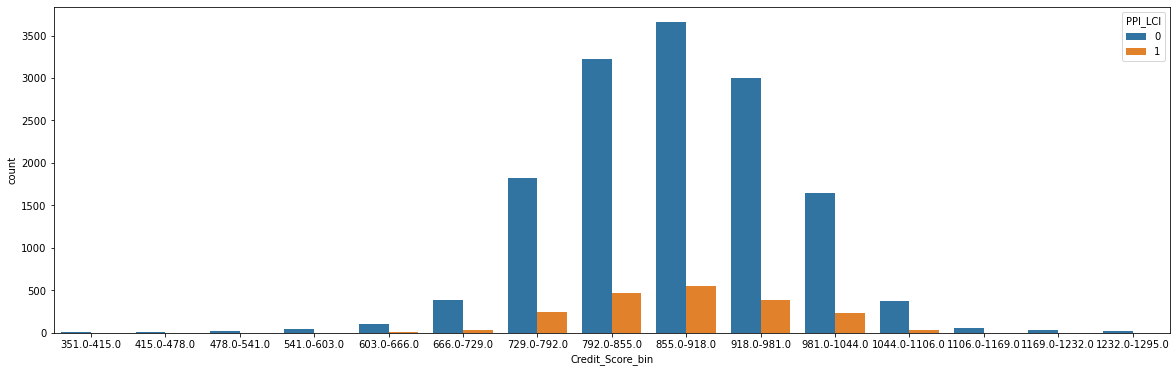

In [746]:
# Credit_Score_bin with hue PPI_LCI

plt.figure(figsize=(20,6))
sns.countplot(df["Credit_Score_bin"],data=df,hue="PPI_LCI");

### Final analysis on credit score

- We can notice that we should always target people with credit score between 700 to 1000 for cross sell insurance
- And we should promote PPI_Single for these people

### Observations on Terms

- The terms are in months
- Min month is 6 and average is 5 years and max is 25 years
- Looks like we don't have outliers here also though 300+ is an extreme value here wkt that some of the loan terms can be max up to 25 yrs
- Let's analyze further by creating countplot to see the most opted term

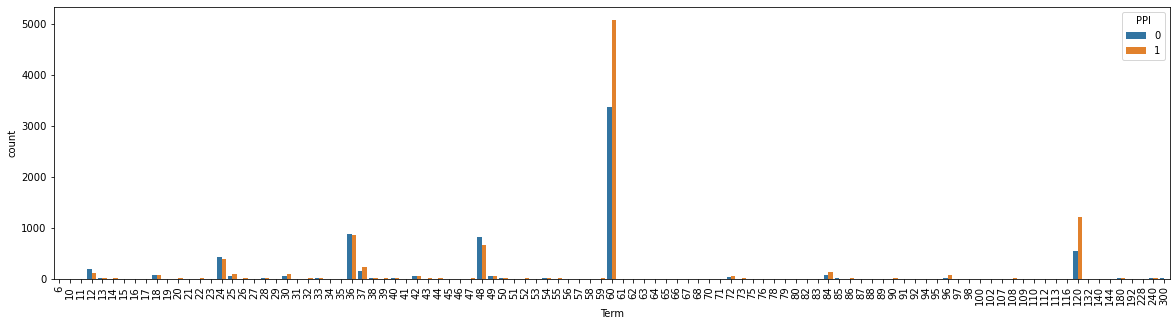

In [747]:
# Countplot for terms

plt.figure(figsize=(20,5))
sns.countplot(df['Term'],data=df,hue = "PPI")
plt.xticks(rotation=90);

##### We can notice that 60 months or 5 years is the most opted term plan. 

since we have so much data here the plot is not clear. So, we will create bins for terms and analyze further.

In [748]:
# Creating bins for terms

df['Termbin'] = (pd.cut(df['Term'], bins = 20, precision = 0)
                          .apply(lambda x: str(x.left) + '-' + str(x.right)))

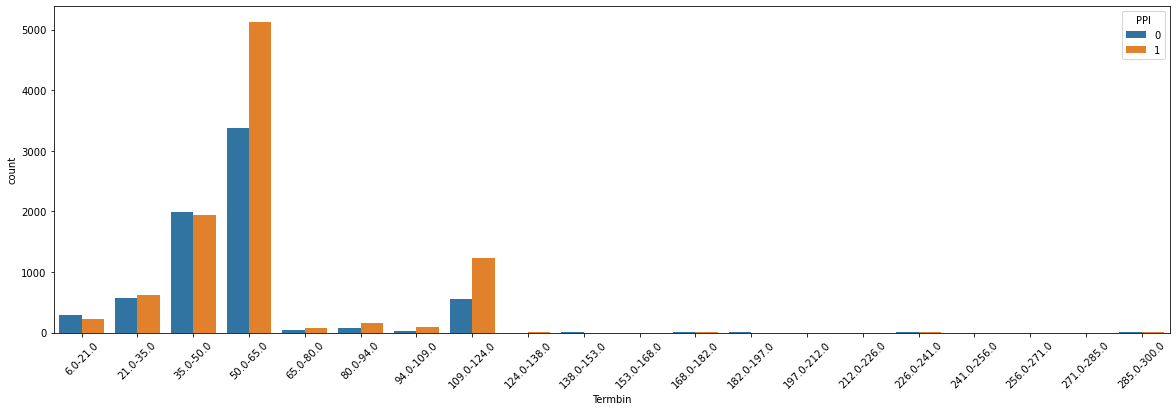

In [749]:
plt.figure(figsize=(20,6))
sns.countplot(df["Termbin"],data=df,hue="PPI")
plt.xticks(rotation=45);

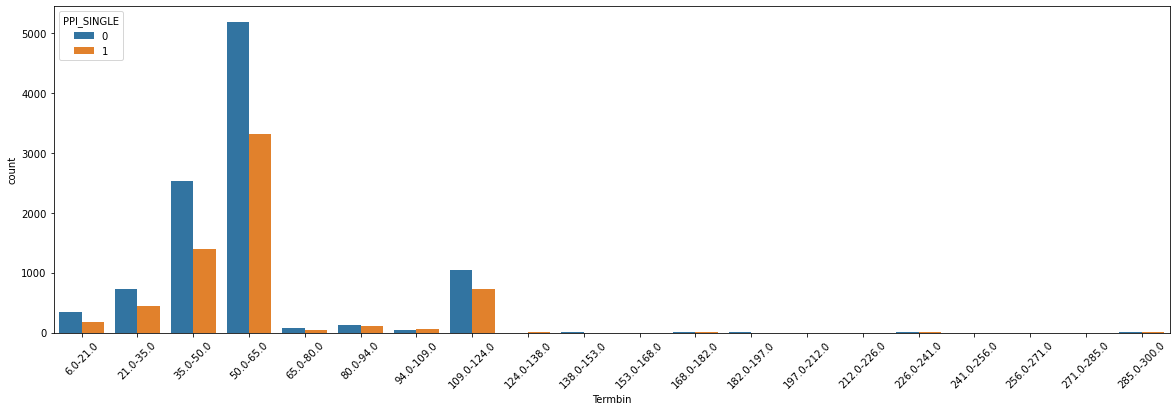

In [750]:
plt.figure(figsize=(20,6))
sns.countplot(df["Termbin"],data=df,hue="PPI_SINGLE")
plt.xticks(rotation=45);

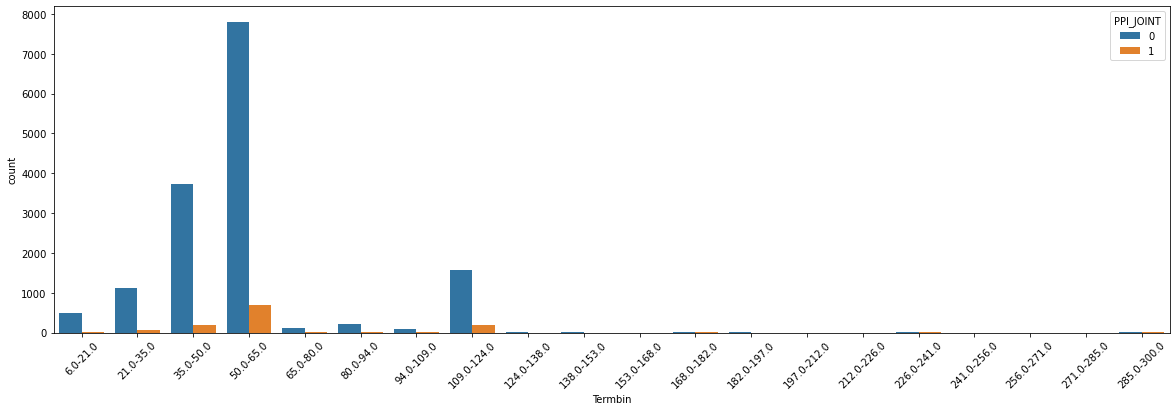

In [751]:
plt.figure(figsize=(20,6))
sns.countplot(df["Termbin"],data=df,hue="PPI_JOINT")
plt.xticks(rotation=45);

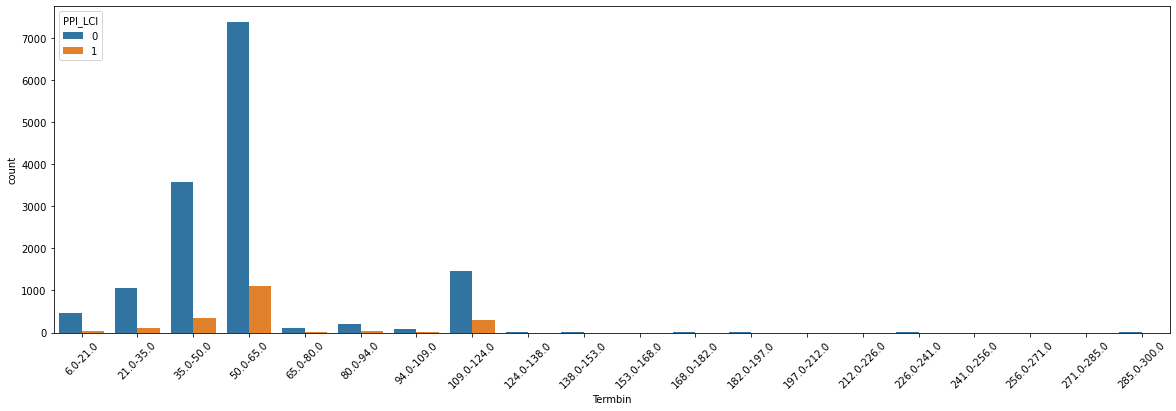

In [752]:
plt.figure(figsize=(20,6))
sns.countplot(df["Termbin"],data=df,hue="PPI_LCI")
plt.xticks(rotation=45);

### Final analysis on Terms

- About 50% of the terms were of 50-65 months irrespective of the PPI flag
- People with term plan between 2 to 5 years and 10 years can buy insurance.It is highly like for people with 5 term plan to buy insurance
- And we should promote PPI_Single for these people

#### Observations on Net_Advance

- looks like we have outliers here as 99% of data lies within 40000
- We will plot percentiles to make sure that 99% of data lies within 40000

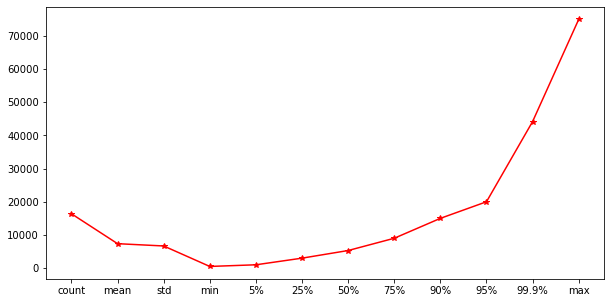

In [753]:
plt.figure(figsize=(10,5))
plt.plot(df.Net_Advance.describe(percentiles=[0.05,.25, .5, .75, .90, .95, .999]),"-*",color="red")
plt.show()

We can note that 99% of data lies within 45000, So we will remove values above 45000

In [754]:
# Removing values above 45000

df=df[df["Net_Advance"]<45000]

### Analyzing Net_Advance by creating bins

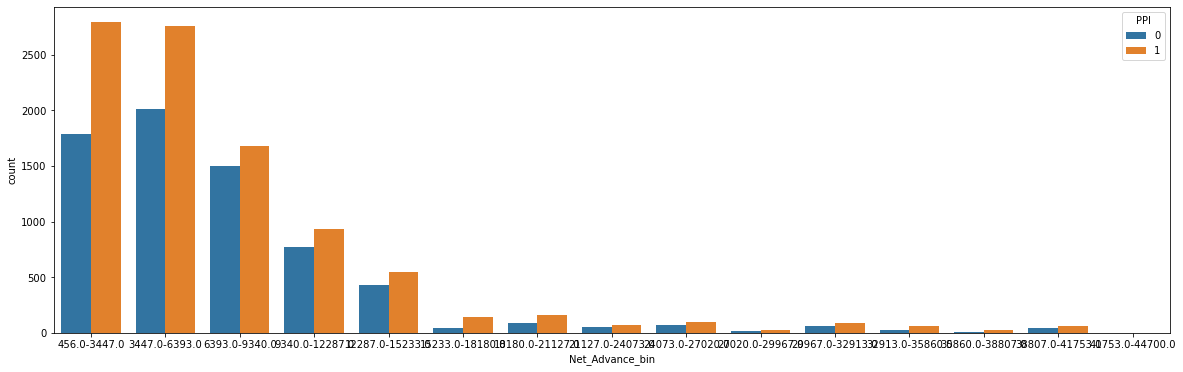

In [755]:
df['Net_Advance_bin'] = (pd.cut(df['Net_Advance'], bins = 15, precision = 0)
                               .apply(lambda x: str(x.left) + '-' + str(x.right)))


plt.figure(figsize=(20,6))
sns.countplot(df["Net_Advance_bin"],data=df,hue="PPI");
#plt.xticks(rotation=45);

### Observations on Net_Advance

- Customers with Net advance between 3447 to 12287 are like to buy PPI products.

In [756]:
# Removing values above 45% APR

df=df[df["APR"]<45]

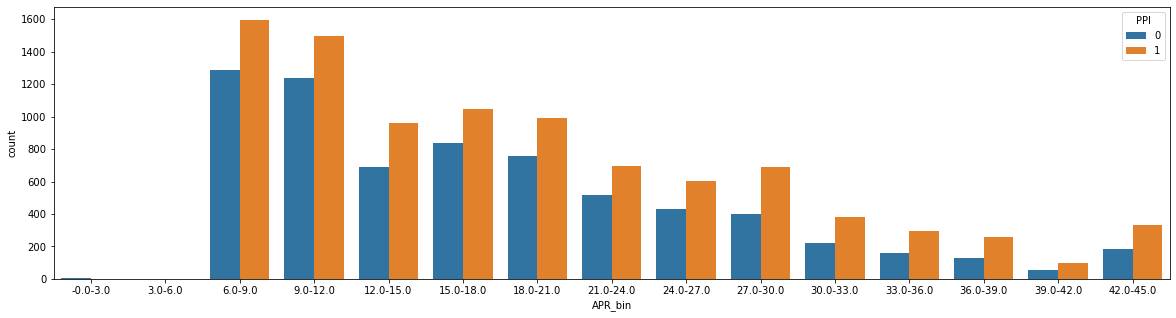

In [757]:
# Creating bin for APR

df['APR_bin'] = (pd.cut(df['APR'], bins = 15, precision = 0)
                               .apply(lambda x: str(x.left) + '-' + str(x.right)))

plt.figure(figsize=(20,5))
sns.countplot(df.APR_bin, hue=df.PPI);

### Observations on APR - Annual percentage Rate

- Customers with loans of APR 6 to 30 are likely to prefer PPI products


#### Analyzing 'Mosaic', 'Mosaic_Class'

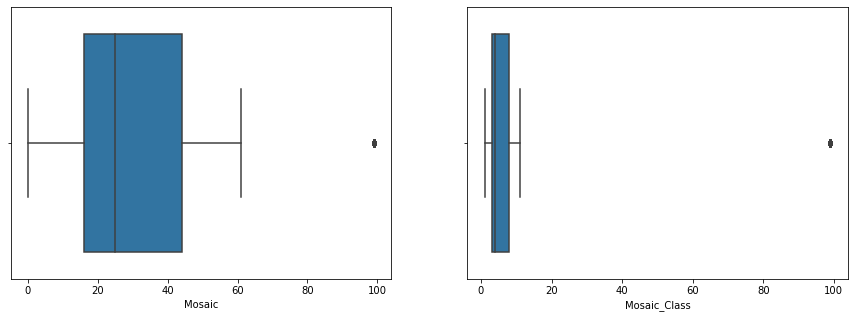

In [758]:
cols = ['Mosaic', 'Mosaic_Class']

plt.figure(figsize = (15, 5))

for i in enumerate(cols):
    plt.subplot(len(cols)//2, 2, i[0]+1)
    sns.boxplot(x = i[1], data = df,hue=df.PPI)
plt.show()

In [759]:
# Checking percentiles for Mosaic data

df.Mosaic_Class.describe(percentiles=[0.05,.25, .5, .75, .90, .95,.98,.99,.999])


count   16366.0000
mean        5.3543
std         5.1319
min         1.0000
5%          1.0000
25%         3.0000
50%         4.0000
75%         8.0000
90%         9.0000
95%        10.0000
98%        11.0000
99%        11.0000
99.9%      99.0000
max        99.0000
Name: Mosaic_Class, dtype: float64

In [760]:
df.Mosaic.describe(percentiles=[0.05,.25, .5, .75, .90, .95,.98,.99,.999])

count   16366.0000
mean       29.4292
std        16.7149
min         0.0000
5%          0.0000
25%        16.0000
50%        25.0000
75%        44.0000
90%        49.0000
95%        55.0000
98%        59.0000
99%        60.0000
99.9%      99.0000
max        99.0000
Name: Mosaic, dtype: float64

#### Removing outliers from Mosaic and Mosaic_class

In [761]:
df = df[df["Mosaic"]<=6]
df = df[df["Mosaic_Class"]<=11]

#### Analyzing 'Time_at_Address', 'Number_of_Dependants'

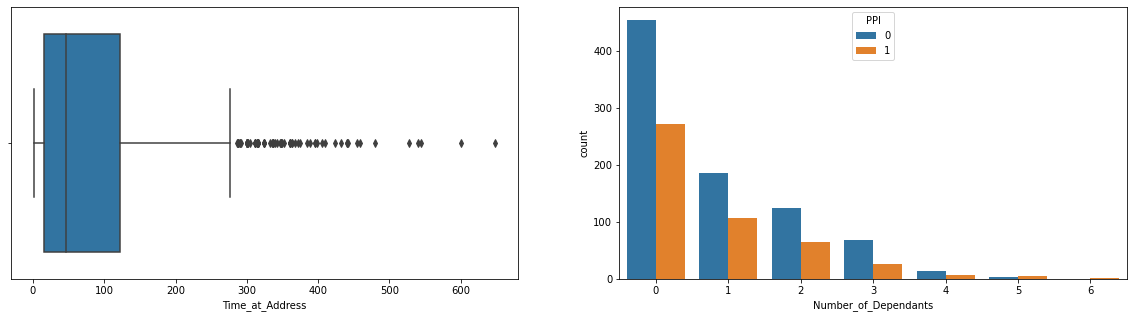

In [762]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df.Time_at_Address)

plt.subplot(1,2,2)
sns.countplot(df.Number_of_Dependants,hue=df.PPI)
plt.show()

In [763]:
# Creating new variable Time_at_Address_Months assuming Time_at_Address is in days

df['Time_at_Address_Months'] = df['Time_at_Address']/31

# Dropping Time_at_Address

df.drop("Time_at_Address",1,inplace=True)

In [764]:
# Creating bins for Time_at_Address_Months (Guessing the values are in days becuase it can't be months as 800/12 = approx 67 yrs)

df['Time_at_Address_bin'] = (pd.cut(df['Time_at_Address_Months'], bins = 10, precision = 0)
                          .apply(lambda x: str(x.left) + '-' + str(x.right)))

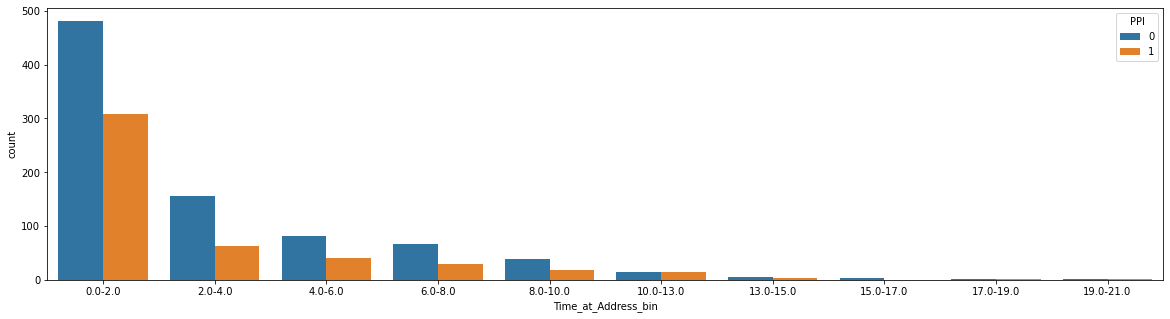

In [765]:
# Count plot for time at adress

plt.figure(figsize=(20,5))
sns.countplot(df.Time_at_Address_bin,hue=df.PPI);

#### Analyzing time at adress with 'PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI'

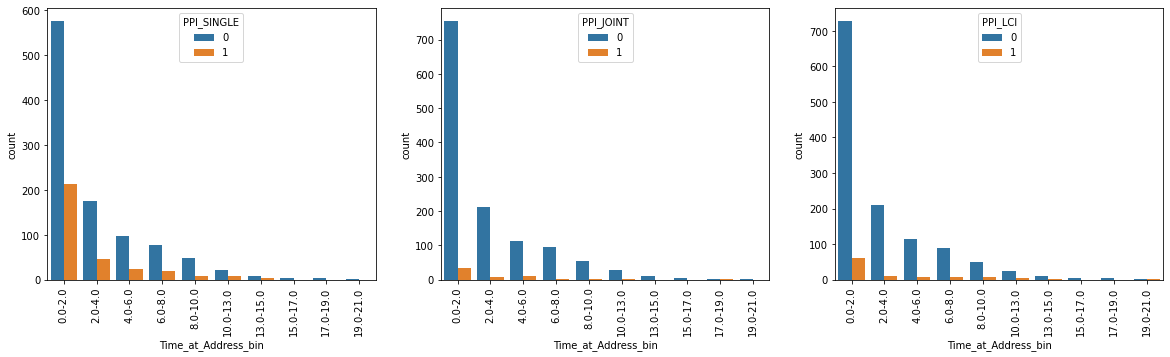

In [766]:
plt.figure(figsize = (20, 5))

hue = ['PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI']

for i in enumerate(hue):
    plt.subplot(len(cols)//2, 3, i[0]+1)
    sns.countplot(x ="Time_at_Address_bin" , data = df,hue=i[1])
    plt.xticks(rotation=90)
plt.show()

#### Analyzing Dependents with 'PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI'

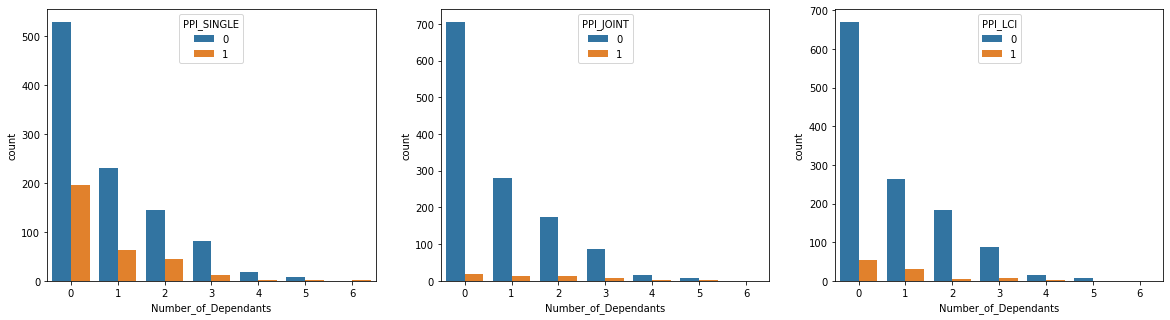

In [767]:
plt.figure(figsize = (20, 5))

hue = ['PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI']

for i in enumerate(hue):
    plt.subplot(len(cols)//2, 3, i[0]+1)
    sns.countplot(x ="Number_of_Dependants" , data = df,hue=i[1])
    #plt.xticks(rotation=90)
plt.show()

### Observations on 'Time_at_Address', 'Number_of_Dependants'

- Customers with no kids are less number of kids below 3 are likely to buy insurance which is intuitive people with less no kids will have more savings then people with more kids.
- Customers staying in the same adress up to 10 months have chances of buying insurance (We can't say that it is true. However, we will anlyze further)
- It is highly likely that people go for PPI_Single

#### ANalyzing 'Time_in_Employment','Income_Range', 'Time_with_Bank'

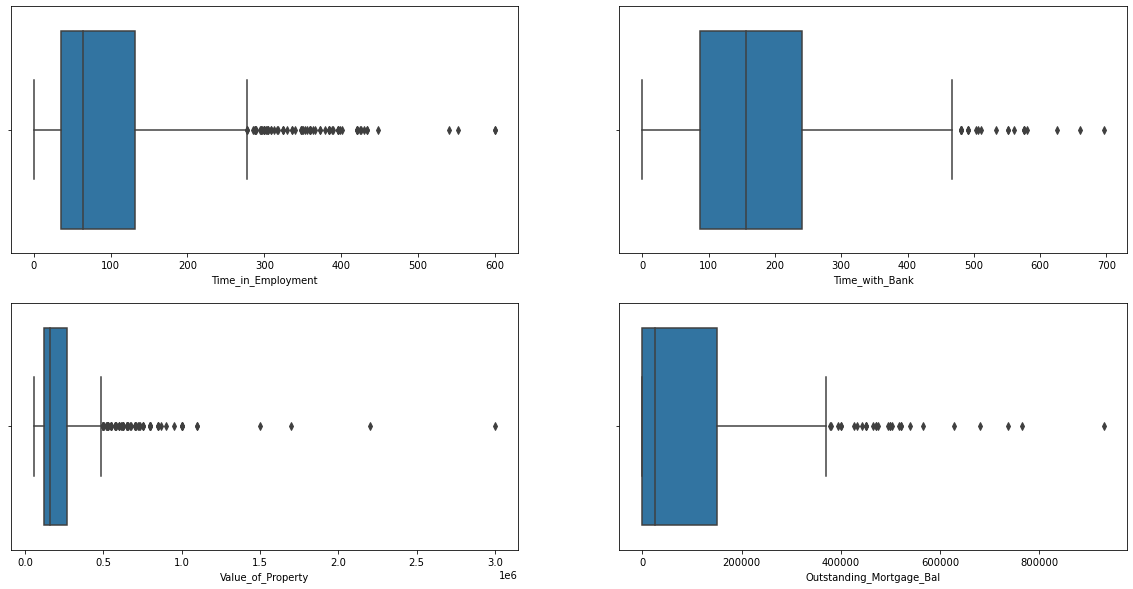

In [768]:
cols = ['Time_in_Employment','Time_with_Bank','Value_of_Property','Outstanding_Mortgage_Bal']

plt.figure(figsize = (20, 10))

for i in enumerate(cols):
    plt.subplot(len(cols)//2, 2, i[0]+1)
    sns.boxplot(x = i[1], data = df,hue=df.PPI)
plt.show()

- We are not treating any outliers here as value of some of the properties can be high and so is it's mortgage balance 
- We will make bins and analyze further

In [769]:
# Lets create bins for  'Time_in_Employment','Time_with_Bank'

df['Time_in_Employment_bin'] = (pd.cut(df['Time_in_Employment'], bins = 10, precision = 0)
                          .apply(lambda x: str(x.left) + '-' + str(x.right)))

df['Time_with_Bank_bin'] = (pd.cut(df['Time_with_Bank'], bins = 10, precision = 0)
                          .apply(lambda x: str(x.left) + '-' + str(x.right)))

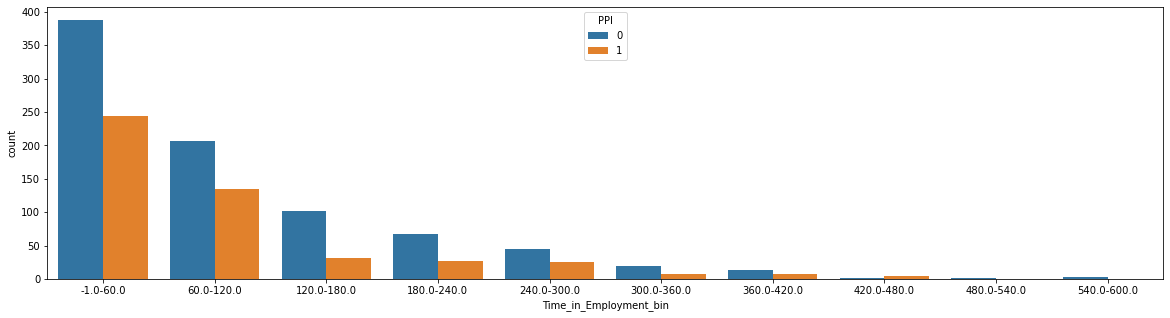

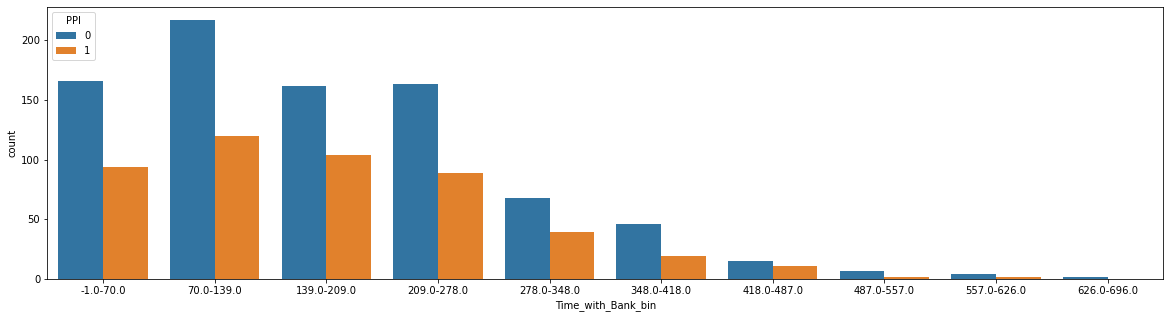

In [770]:
# Count plot for 'Time_in_Employment','Time_with_Bank_bin'

plt.figure(figsize=(20,5))
sns.countplot(df.Time_in_Employment_bin,hue=df.PPI);

plt.figure(figsize=(20,5))
sns.countplot(df.Time_with_Bank_bin,hue=df.PPI);

### Observations on 'Time_in_Employment','Time_with_Bank_bin'

- Customers who are employed between 60 to 120 are likely to buy PPI Products
- Customers who are with bank between 70 to 278 are likely to buy PPI Products

### Analyzing Value_of_property

In [771]:
# Creating bins for Value_of_property

df['Value_of_Property_bin'] = (pd.cut(df['Value_of_Property'], bins = 10, precision = 0)
                          .apply(lambda x: str(x.left) + '-' + str(x.right)))

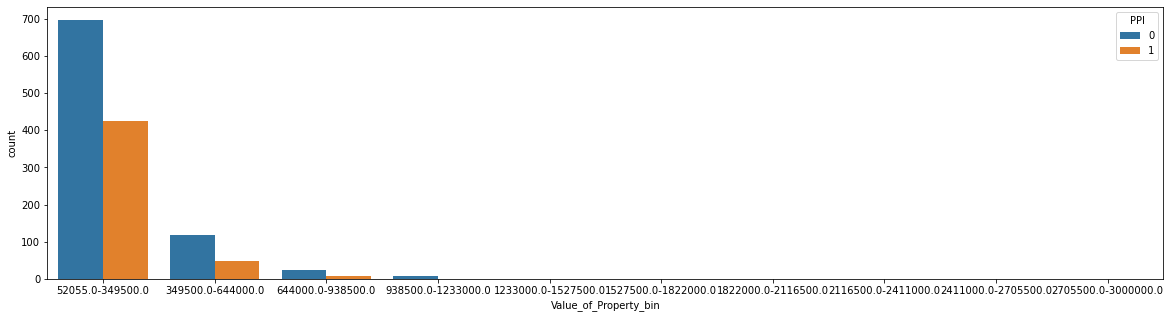

In [772]:
# Plotting value_of_property_bin

plt.figure(figsize=(20,5))
sns.countplot(df.Value_of_Property_bin,hue=df.PPI);

### Observations on Value_of_property

- PPI products can be targeted to customers with a value of property b/w 0 and 349500, accounts for 25%-30% of the total customers 

#### Creating bins for Outstanding_Mortgage_Bal, Total_Outstanding_Balances, Total_outstanding_balance__mortg

In [773]:
df['Outstanding_Mortgage_Bal_bin'] = (pd.cut(df['Outstanding_Mortgage_Bal'], bins = 10, precision = 0)
                          .apply(lambda x: str(x.left) + '-' + str(x.right)))

df['Total_Outstanding_Balances_bin'] = (pd.cut(df['Total_Outstanding_Balances'], bins = 10, precision = 0)
                          .apply(lambda x: str(x.left) + '-' + str(x.right)))

df['Total_outstanding_balance__mortg_bin'] = (pd.cut(df['Total_outstanding_balance__mortg'], bins = 10, precision = 0)
                          .apply(lambda x: str(x.left) + '-' + str(x.right)))

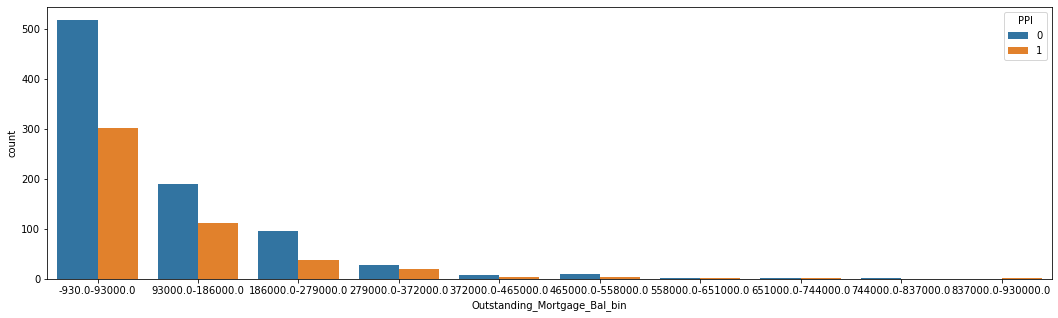

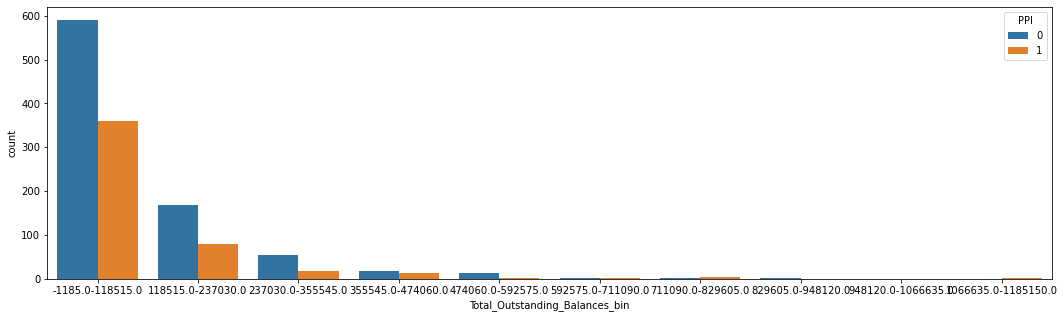

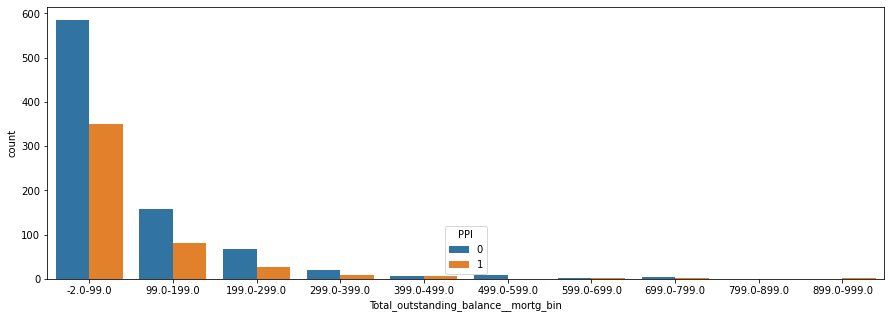

In [774]:
# Count plot for 'Outstanding_Mortgage_Bal and Total_Outstanding_Balances , Total_outstanding_balance__mortg

plt.figure(figsize=(18,5))
sns.countplot(df.Outstanding_Mortgage_Bal_bin,hue=df.PPI);


plt.figure(figsize=(18,5))
sns.countplot(df.Total_Outstanding_Balances_bin,hue=df.PPI);

plt.figure(figsize=(15,5))
sns.countplot(df.Total_outstanding_balance__mortg_bin,hue=df.PPI);

### Observations on Outstanding_Mortgage_Bal , Total_Outstanding_Balances and Total_outstanding_balance__mortg

- People with low outstanding are highly likely to buy insurance

#### Analyzing Income_Range and Bureau_Data___Monthly_Other_Co_R

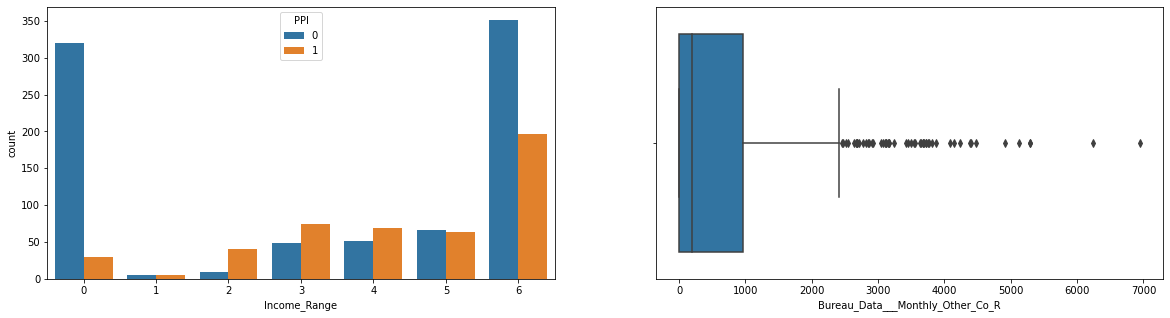

In [775]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(df.Income_Range, hue=df.PPI)

plt.subplot(1,2,2)
sns.boxplot(df.Bureau_Data___Monthly_Other_Co_R)

plt.show()

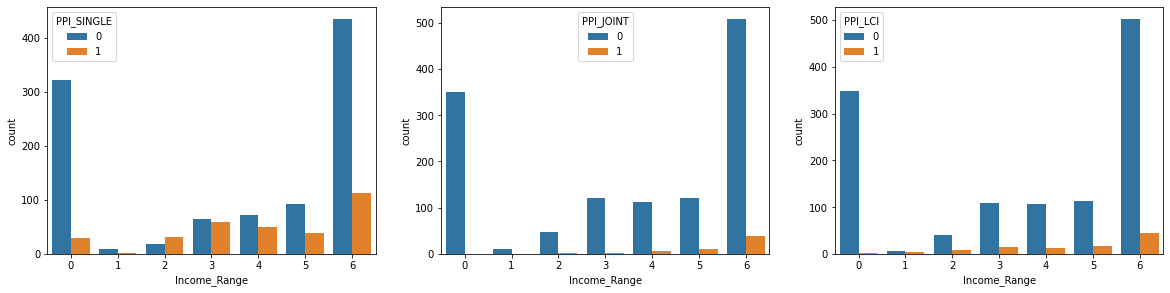

In [776]:
plt.figure(figsize = (20, 10))

hue = ['PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI']

for i in enumerate(hue):
    plt.subplot(len(cols)//2, 3, i[0]+1)
    sns.countplot(x ="Income_Range" , data = df,hue=i[1])
    #plt.xticks(rotation=90)
plt.show()

### Observations on Income_Range and Bureau_Data___Monthly_Other_Co_R

- People with income range from medium to high can be approached for insurance and it is likely that people with high income can buy insurance.
- People prefer PPI_single over others.
- since the values are continuous let's not treat any outliers here for Bureau_Data___Monthly_Other_Co_R

#### Analyzing Age and Worst_History_CT

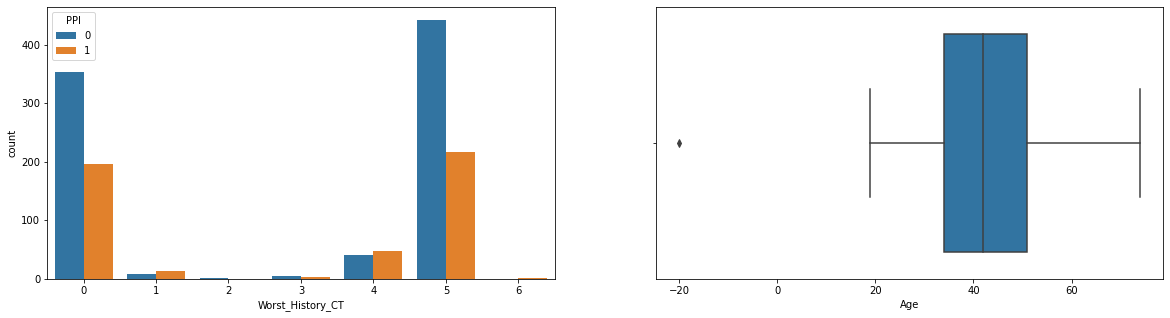

In [777]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(df.Worst_History_CT, hue=df.PPI)

plt.subplot(1,2,2)
sns.boxplot(df.Age, hue=df.PPI)

plt.show()

We have negative values in Age column, let's change them to positive values

In [778]:
df.Age=abs(df.Age)

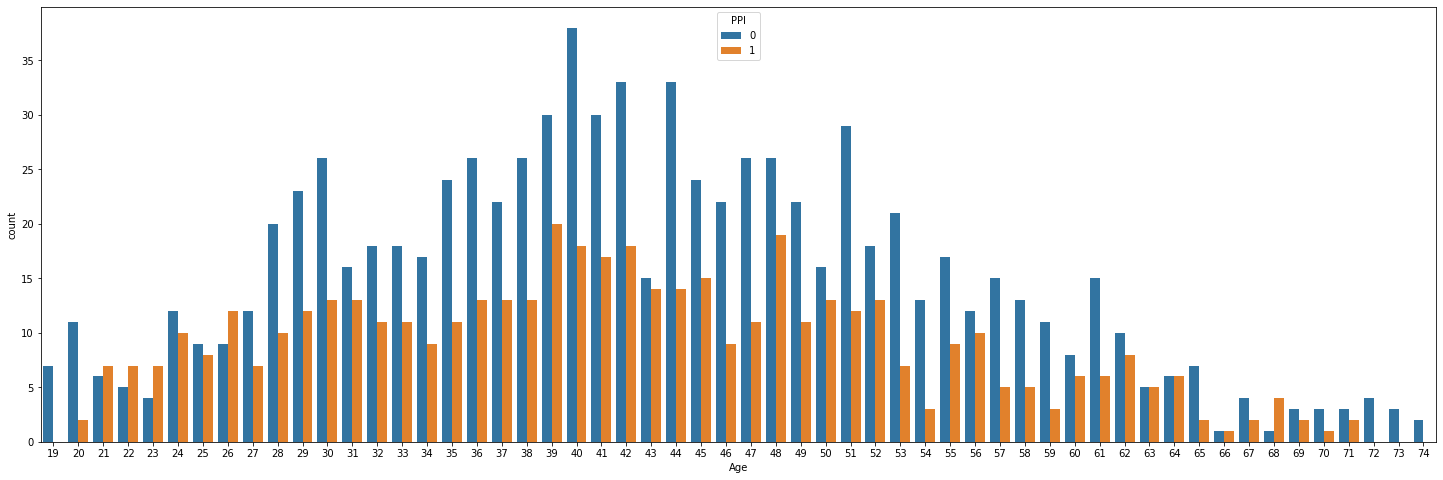

In [779]:
# Analyzing age after changing negative values

plt.figure(figsize=(25,8))
sns.countplot(df.Age, hue=df.PPI);

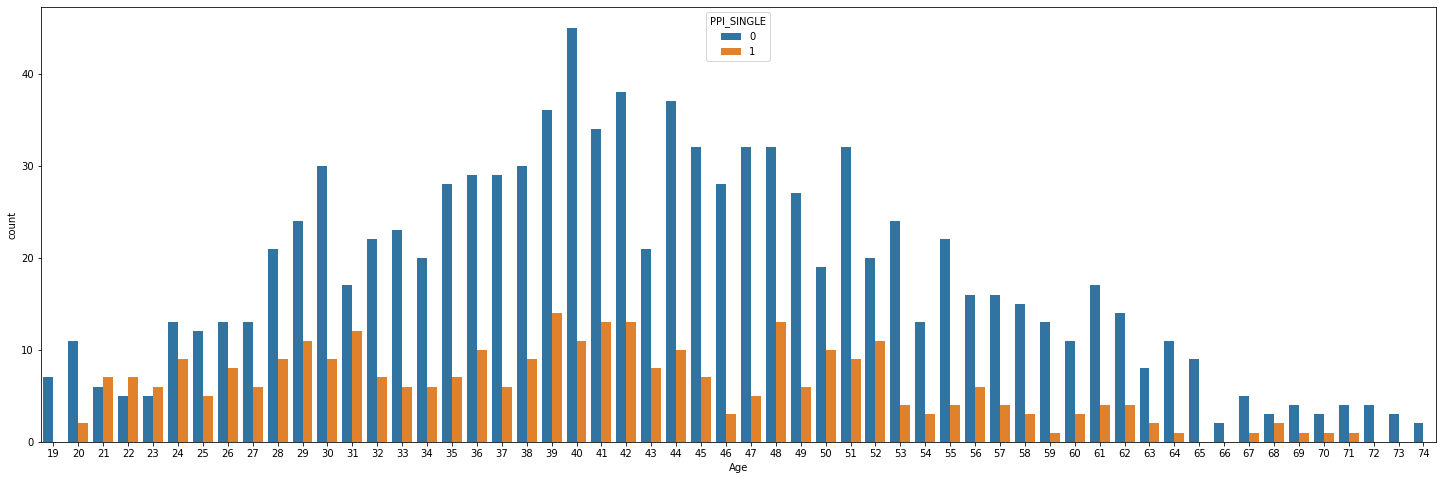

In [780]:
# plot for PPI_SINGLE with age

plt.figure(figsize=(25,8))
sns.countplot(df.Age, hue=df.PPI_SINGLE);

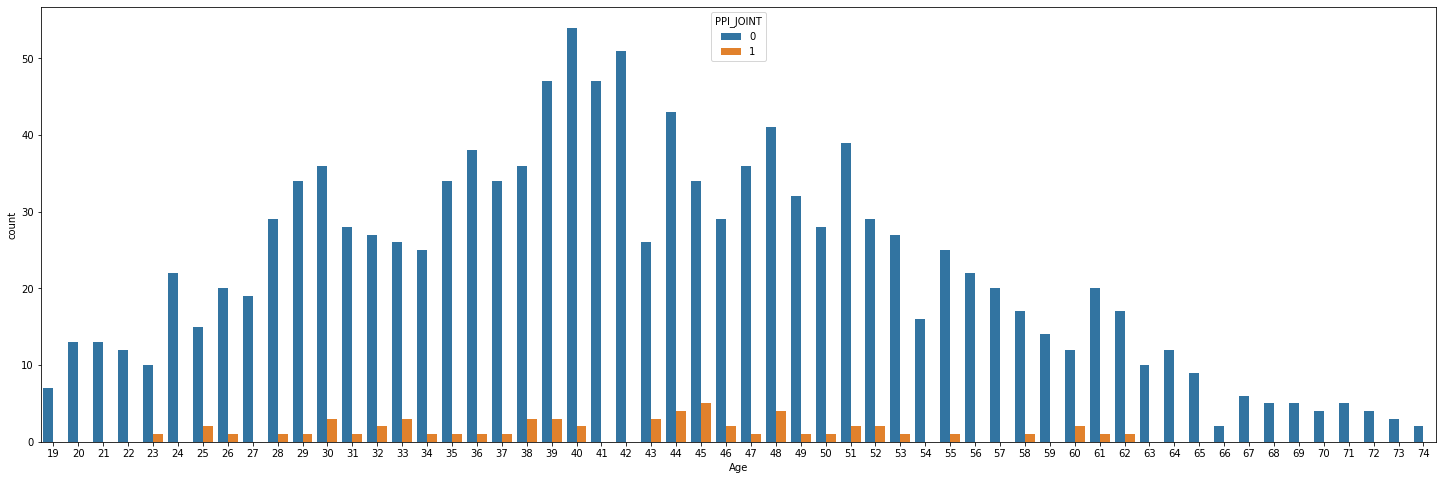

In [781]:
# plot for PPI_JOINT with age

plt.figure(figsize=(25,8))
sns.countplot(df.Age, hue=df.PPI_JOINT);

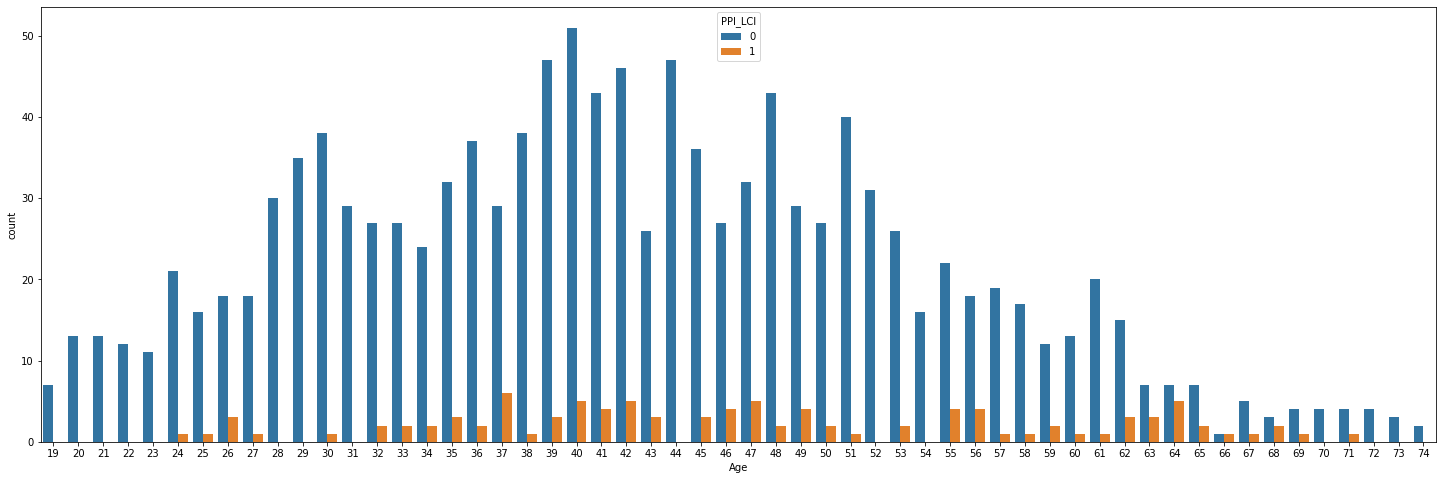

In [782]:
# plot for PPI_LCI with age

plt.figure(figsize=(25,8))
sns.countplot(df.Age, hue=df.PPI_LCI);

### Observations on Age and Worst_History_CT

- We can approach people aged between 20 and 60 for insurance
- people aged between 30 to 50 are more to likely buy insurance
- people buying single insuranc eare higher
- people around 40's and 60s can be approached for joint and LCI

#### ANalyzing 'Total___Public_Info___CCJ____ban','Total_value__Public_Info___CCJ__', 'Time_since_most_recent_Public_In','Total_value__CAIS_8_9s'

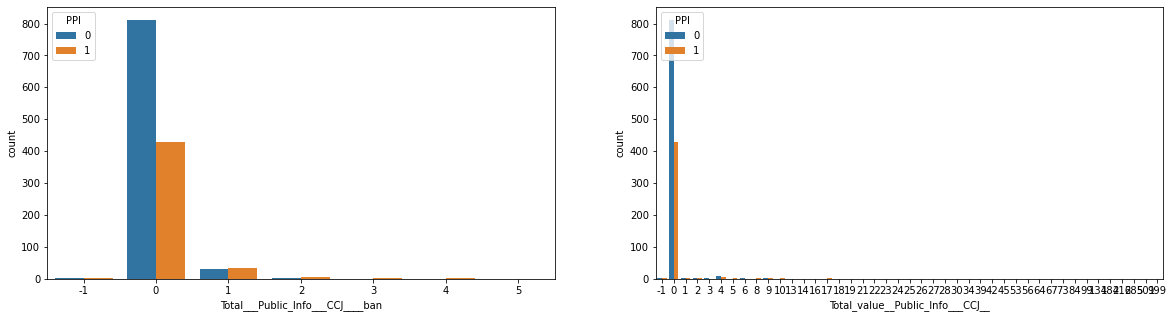

In [783]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(df.Total___Public_Info___CCJ____ban, hue=df.PPI)

plt.subplot(1,2,2)
sns.countplot(df.Total_value__Public_Info___CCJ__, hue=df.PPI)

plt.show()

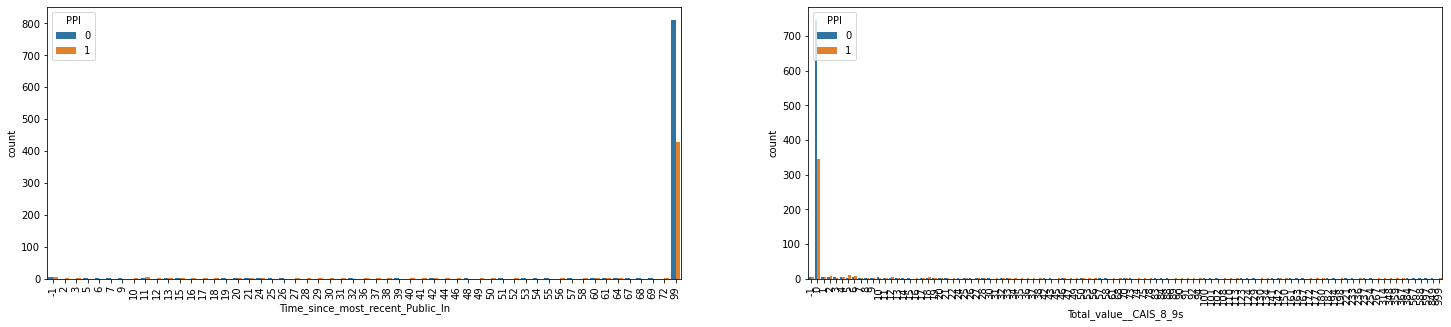

In [784]:
plt.figure(figsize=(25,5))

plt.subplot(1,2,1)
sns.countplot(df.Time_since_most_recent_Public_In, hue=df.PPI)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(df.Total_value__CAIS_8_9s, hue=df.PPI)
plt.xticks(rotation=90)

plt.show()

### Observations on ANalyzing 'Total___Public_Info___CCJ____ban','Total_value__Public_Info___CCJ__', 'Time_since_most_recent_Public_In','Total_value__CAIS_8_9s'

- Since these variables are highly skewed we will drop these variables to avoid biased results

In [785]:
df. drop(['Total___Public_Info___CCJ____ban','Total_value__Public_Info___CCJ__',
          'Time_since_most_recent_Public_In','Total_value__CAIS_8_9s'],1,inplace=True)

#### Analyzing 'Worst_status_L6m', 'Worst_CUrrent_Status'

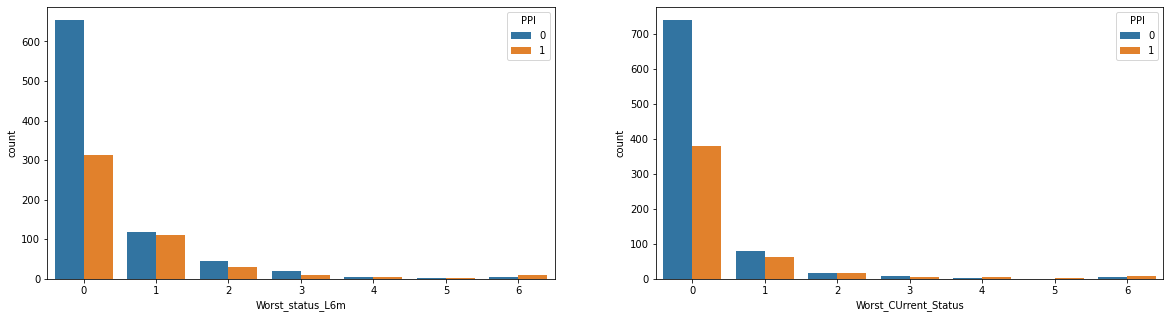

In [786]:
cols = ['Worst_status_L6m', 'Worst_CUrrent_Status']

plt.figure(figsize = (20, 5))

for i in enumerate(cols):
    plt.subplot(len(cols)//2, 2, i[0]+1)
    sns.countplot(x = i[1], data = df,hue=df.PPI)
plt.show()

Since these two variables are very similar lets check the correlation 

In [787]:
df[['Worst_status_L6m', 'Worst_CUrrent_Status']].corr()

,Worst_status_L6m,Worst_CUrrent_Status
Worst_status_L6m,1.0000,0.7481
Worst_CUrrent_Status,0.7481,1.0000


### Observations on 'Worst_status_L6m', 'Worst_CUrrent_Status'

There is significant positive correlation of .75 between these two variables and we can drop one of the variable. For now we will keep these variables and drop them after checking correlation matrix.

- people with status 0 or 1 can be approached for insurance and people with status 0 should be given high priority

#### ANalyzing 'Searches___Total___L6m', 'Years_on_ER_for_SP'

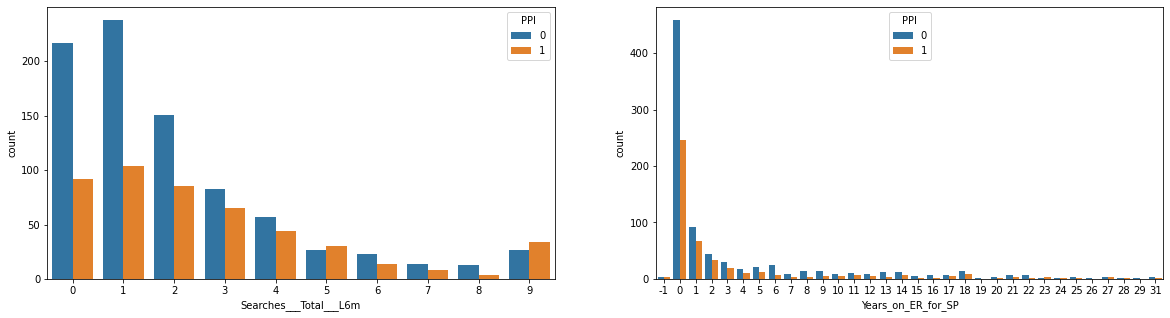

In [788]:
cols = ['Searches___Total___L6m', 'Years_on_ER_for_SP']

plt.figure(figsize = (20, 5))

for i in enumerate(cols):
    plt.subplot(len(cols)//2, 2, i[0]+1)
    sns.countplot(x = i[1], data = df,hue=df.PPI)
plt.show()

### Observations on 'Searches___Total___L6m', 'Years_on_ER_for_SP'

- people with 0 to 2 years on erp can be approached for insurance and people 0 years on erp are highly likely to go for insurance
- people between 0-4 searches and 9 can be approached for insurance

#### Analyzing 'Total___outstanding_CCJ_s', 'Total_outstanding_balance___excl'

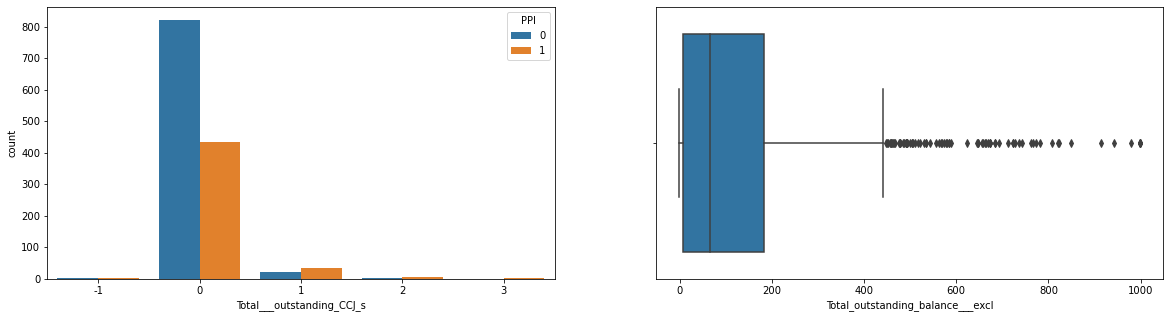

In [789]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(df.Total___outstanding_CCJ_s, hue=df.PPI)

plt.subplot(1,2,2)
sns.boxplot(df.Total_outstanding_balance___excl, hue=df.PPI)

plt.show()

In [790]:
# We will create bins for Total_outstanding_balance___excl

df['Total_outstanding_balance_excl_bin1'] = (pd.cut(df['Total_outstanding_balance___excl'], bins = 10, precision=0)
                                             .apply(lambda x : str(x.left) + "-"+ str(x.right)))

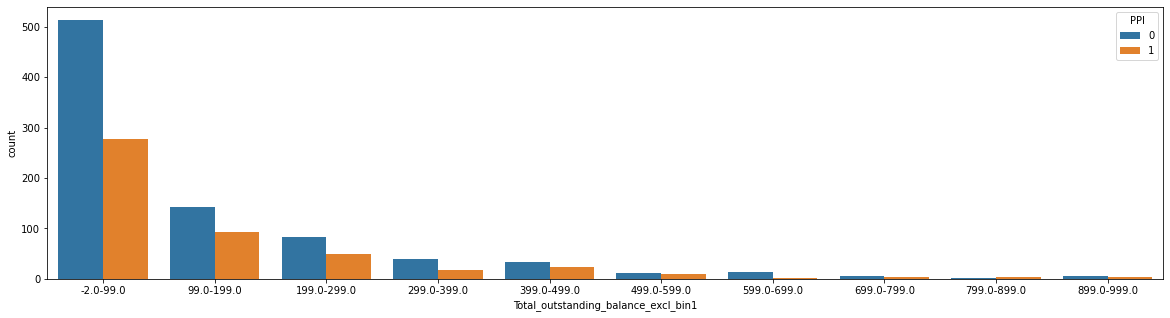

In [791]:
plt.figure(figsize=(20,5))
sns.countplot(df.Total_outstanding_balance_excl_bin1, hue=df.PPI);

### Observations on Analyzing 'Total___outstanding_CCJ_s', 'Total_outstanding_balance___excl'

- It is intuitive that people with low outstanding may go fo insurance

#### Analyzing Time_since_most_recent_outstandi

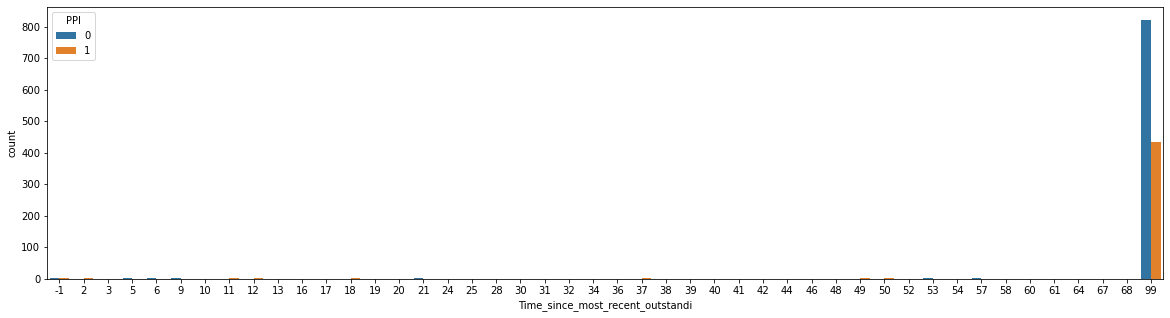

In [792]:
plt.figure(figsize=(20,5))
sns.countplot(df.Time_since_most_recent_outstandi, hue=df.PPI);

Since Time_since_most_recent_outstandiis highly biased we will drop this variable

In [793]:
df.drop("Time_since_most_recent_outstandi",1,inplace=True)

#### analyzing Total___of_accounts

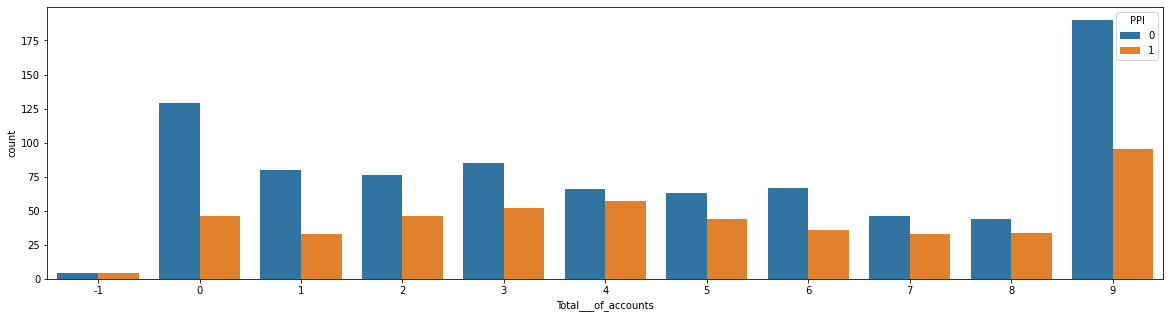

In [794]:
plt.figure(figsize=(20,5))
sns.countplot(df.Total___of_accounts, hue=df.PPI);

There is a negative value in the accounts, which is not possible so we will remove rows with negative account no

In [795]:
df = df[df["Total___of_accounts"]>=0]

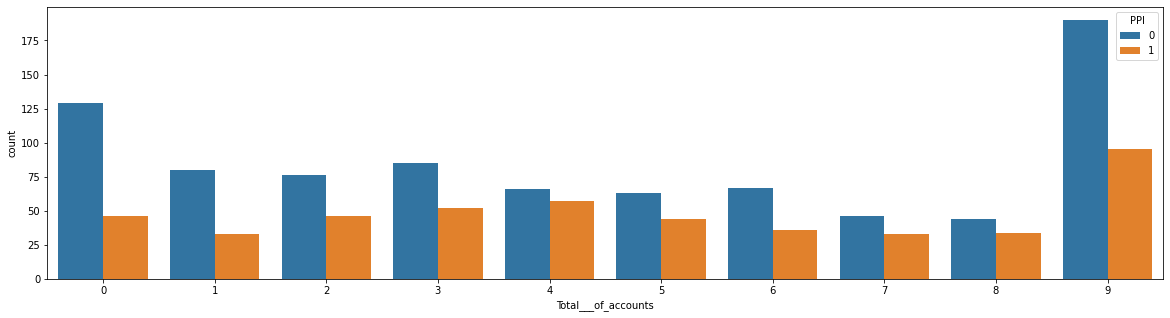

In [870]:
# Plotting again after removing negative values

plt.figure(figsize=(20,5))
sns.countplot(df.Total___of_accounts, hue=df.PPI);

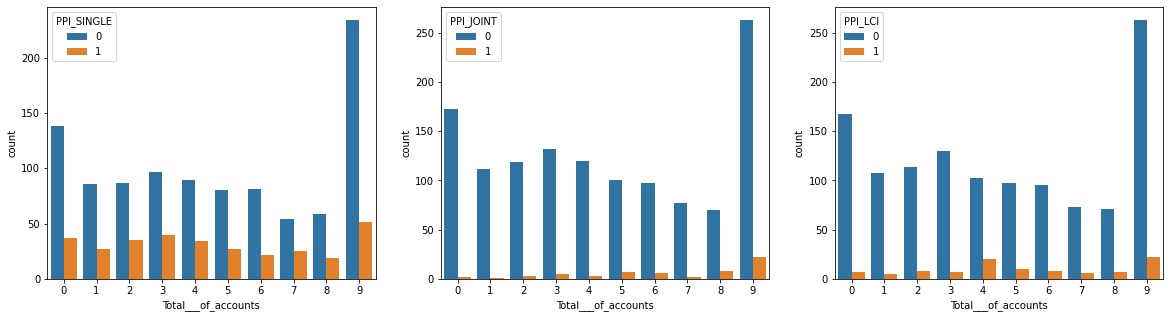

In [796]:
# Analyzing Total___of_accounts with 'PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI'

plt.figure(figsize = (20, 5))

hue = ['PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI']

for i in enumerate(hue):
    plt.subplot(len(cols)//2, 3, i[0]+1)
    sns.countplot(x ="Total___of_accounts" , data = df,hue=i[1])
    #plt.xticks(rotation=90)
plt.show()

### Observations on Total___of_accounts

- We don't see any patterns in account numbers related to PPIs
- Again here we can note that people preper single insurance than LCI or joint

### Analyzing categorical variables now

#### ANalyzing 'Final_Grade', 'Loan_Type'

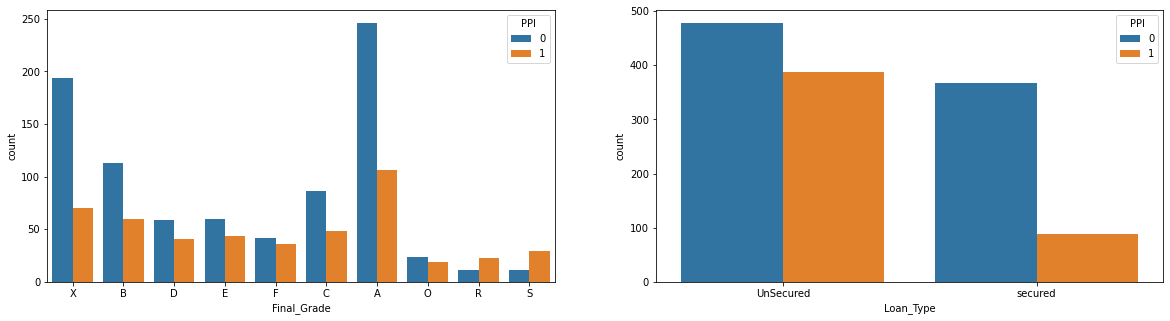

In [797]:
cols = ['Final_Grade', 'Loan_Type']

plt.figure(figsize=(20,5))

for i in enumerate(cols):
    plt.subplot(len(cols)//2,2,i[0]+1)
    sns.countplot(x=i[1], data=df, hue=df.PPI);

#### We have high cardinality in Final_Grade so we will group the data with less percentage of values under new category 

In [798]:
df.Final_Grade.value_counts(normalize=True)

A   0.2663
X   0.1997
B   0.1309
C   0.1014
E   0.0787
D   0.0756
F   0.0590
O   0.0325
S   0.0303
R   0.0257
Name: Final_Grade, dtype: float64

#### We will group O,R,S under "other" category as they are less than 5%

In [799]:
df["Final_Grade"] = df.Final_Grade.apply(lambda x: "others" if x in "ORS" else x)

# or df["Final_Grade"] = df.Final_Grade.replace(["O","R","S"],"E+")

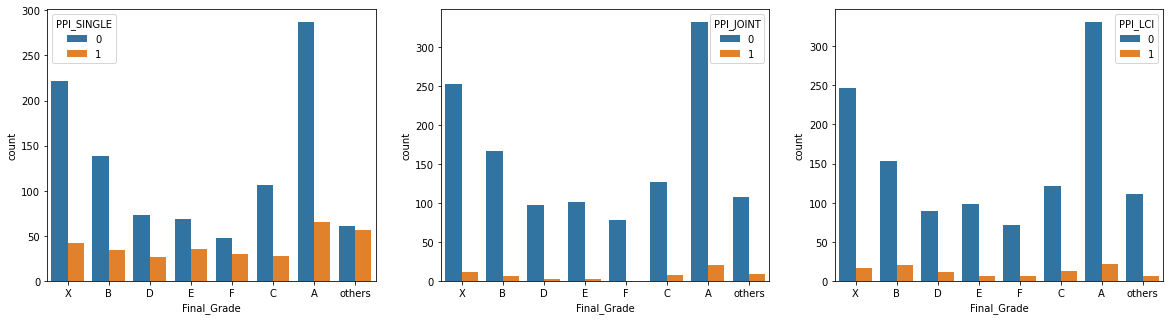

In [800]:
# Analyzing Final_Grade with 'PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI'

plt.figure(figsize = (20, 5))

hue = ['PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI']

for i in enumerate(hue):
    plt.subplot(len(cols)//2, 3, i[0]+1)
    sns.countplot(x ="Final_Grade" , data = df,hue=i[1])
    #plt.xticks(rotation=90)
plt.show()

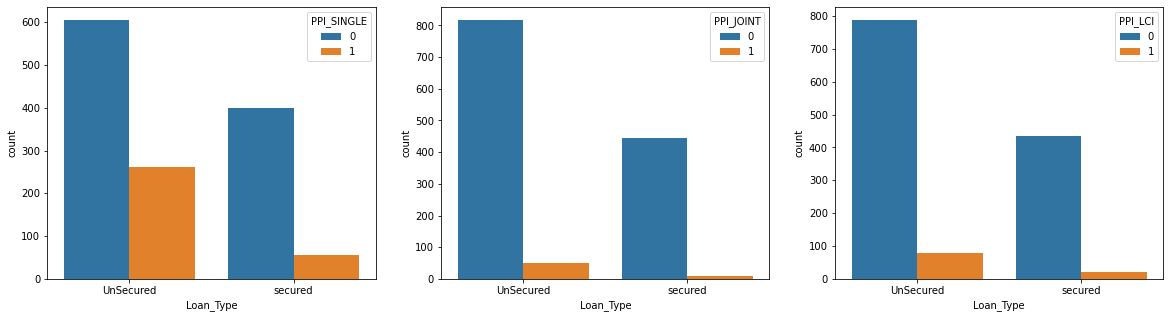

In [801]:
# Analyzing Final_Grade with 'PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI'

plt.figure(figsize = (20, 5))

hue = ['PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI']

for i in enumerate(hue):
    plt.subplot(len(cols)//2, 3, i[0]+1)
    sns.countplot(x ="Loan_Type" , data = df,hue=i[1])
    #plt.xticks(rotation=90)
plt.show()

### Observations on 'Final_Grade', 'Loan_Type'

- People with grades from A to X can be approached for insurance
- People with grade A and X are likely to buy PPIs than others.
- People with unsecured loan type are likely to buy insurance than people with secured loan type.
- people with grades A,B,X can be approached for Joint or LCIs

#### Analyzing 'Residential_Status', 'Telephone_Indicator'

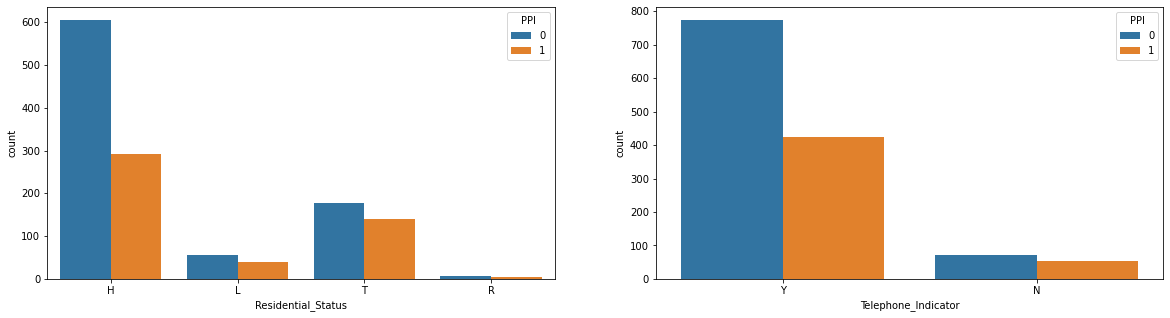

In [802]:
cols = ['Residential_Status', 'Telephone_Indicator']

plt.figure(figsize=(20,5))

for i in enumerate(cols):
    plt.subplot(len(cols)//2,2,i[0]+1)
    sns.countplot(x=i[1], data=df, hue=df.PPI);

In [803]:
# CHecking cardinalityy for Residential_Status

df.Residential_Status.value_counts(normalize=True)

H   0.6778
T   0.2413
L   0.0719
R   0.0091
Name: Residential_Status, dtype: float64

In [804]:
# Grouping L and R under "other" category

df.Residential_Status = df.Residential_Status.replace(["L","R"],"Others")

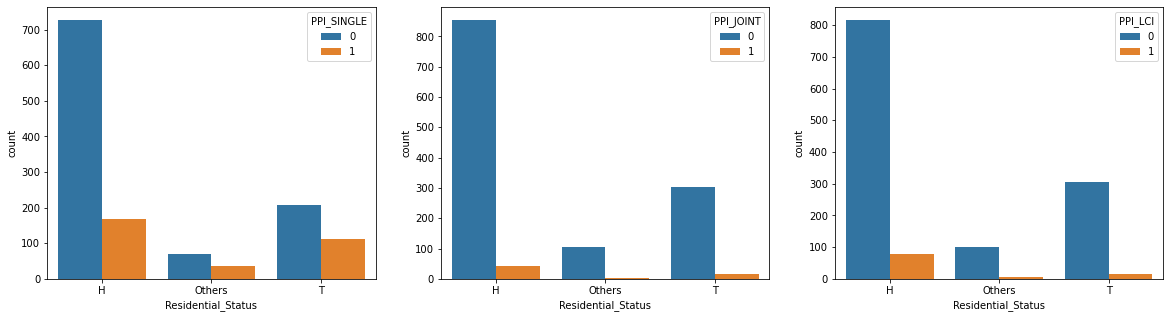

In [805]:
# Analyzing Residential_Status with 'PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI'

plt.figure(figsize = (20, 5))

hue = ['PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI']

for i in enumerate(hue):
    plt.subplot(len(cols)//2, 3, i[0]+1)
    sns.countplot(x ="Residential_Status" , data = df,hue=i[1])
    #plt.xticks(rotation=90)
plt.show()

### Observations on 'Residential_Status', 'Telephone_Indicator'

- People with Housing status H and L should be approached for PPIs
- People with Housing status H can be approached for Joint PPIs and LCIs
- People with phones should be approached for PPIs

#### Analyzing 'Marital_Status', 'Gender'

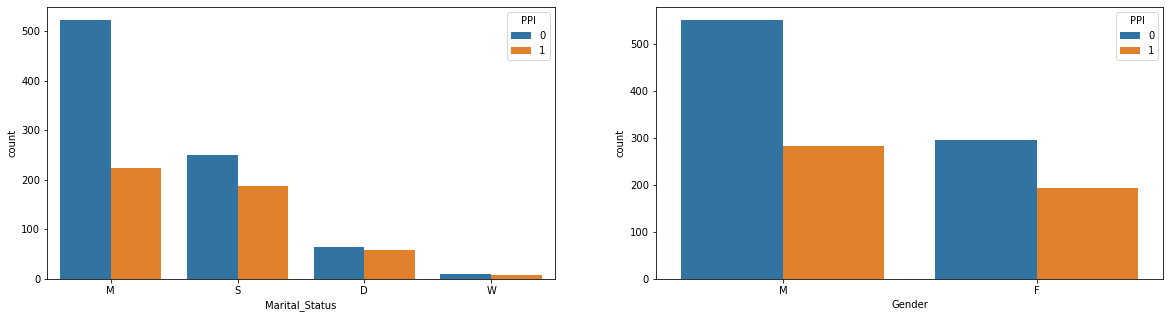

In [806]:
cols = ['Marital_Status', 'Gender']

plt.figure(figsize=(20,5))

for i in enumerate(cols):
    plt.subplot(len(cols)//2,2,i[0]+1)
    sns.countplot(x=i[1], data=df, hue=df.PPI);

In [807]:
# Grouping D,S in Mariatal_status under other category

df.Marital_Status = df.Marital_Status.replace(["D","W"],"Others")

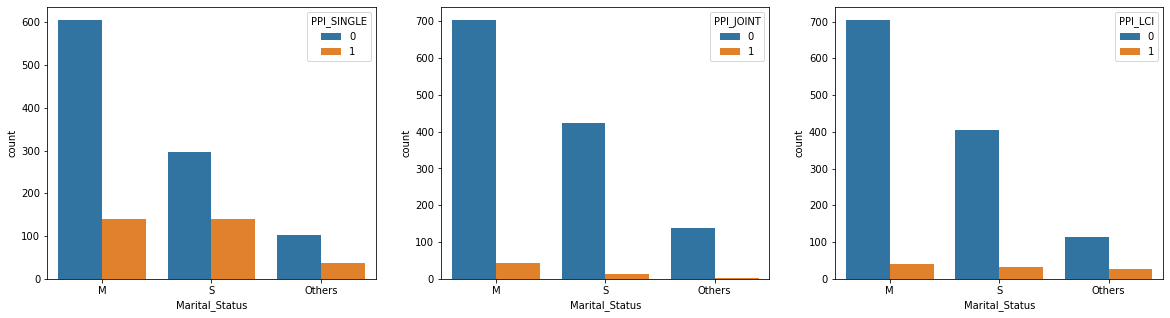

In [808]:
# Analyzing Residential_Status with 'PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI'

plt.figure(figsize = (20, 5))

hue = ['PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI']

for i in enumerate(hue):
    plt.subplot(len(cols)//2, 3, i[0]+1)
    sns.countplot(x ="Marital_Status" , data = df,hue=i[1])
    #plt.xticks(rotation=90)
plt.show()

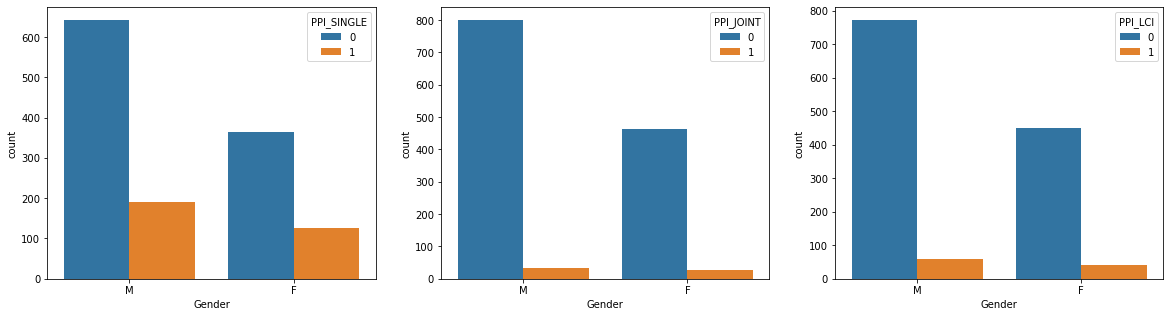

In [809]:
# Analyzing Residential_Status with 'PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI'

plt.figure(figsize = (20, 5))

hue = ['PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI']

for i in enumerate(hue):
    plt.subplot(len(cols)//2, 3, i[0]+1)
    sns.countplot(x ="Gender" , data = df,hue=i[1])
    #plt.xticks(rotation=90)
plt.show()

### Observations on 'Marital_Status', 'Gender'

- Married and single people prefer PPIs than Divorce or wodowed 
- SIngle PPIs are prefered more
- No significant patterns in Gender except that there are more Male without Insurance than Female

#### Analyzing 'Employment_Status','Full_Part_Time_Empl_Ind', 'Perm_Temp_Empl_Ind'



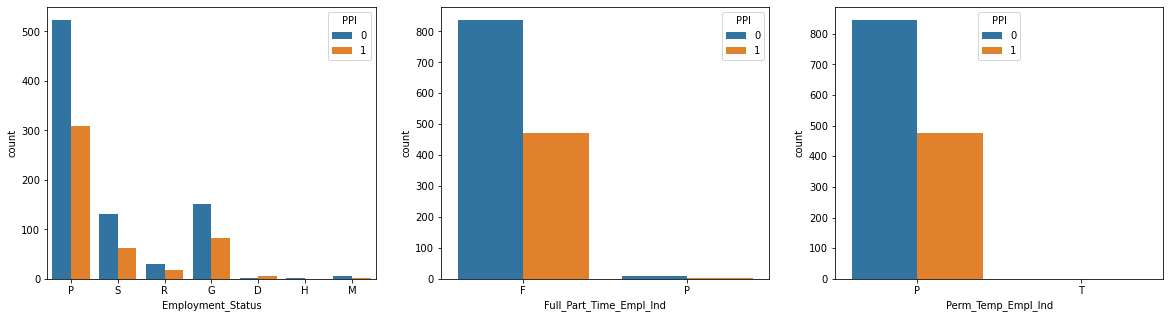

In [810]:
cols = ['Employment_Status','Full_Part_Time_Empl_Ind', 'Perm_Temp_Empl_Ind']

plt.figure(figsize=(20,5))

for i in enumerate(cols):
    plt.subplot(len(cols)//2,3,i[0]+1)
    sns.countplot(x=i[1], data=df, hue=df.PPI);

In [811]:
# Checking cardinality distribution for Employment_Status

df.Employment_Status.value_counts(normalize=True)

P   0.6293
G   0.1762
S   0.1467
R   0.0363
D   0.0053
M   0.0045
H   0.0015
Name: Employment_Status, dtype: float64

In [812]:
# Grouping R,D,H,M under other for Employment_Status as they are less than 5 %

df.Employment_Status = df.Employment_Status.replace(["R","D","H","M"],"Others")

In [813]:
# 'Full_Part_Time_Empl_Ind' and 'Perm_Temp_Empl_Ind' are very identical so, we will derive a new variable by concatenating their values

df["Full_or_Parttime_Perm_or_Temp"] = df["Full_Part_Time_Empl_Ind"]+"_"+df["Perm_Temp_Empl_Ind"]

In [814]:
# Dropping 'Full_Part_Time_Empl_Ind' and 'Perm_Temp_Empl_Ind' as we have created new variable using them

df.drop(['Full_Part_Time_Empl_Ind','Perm_Temp_Empl_Ind'],1,inplace=True)

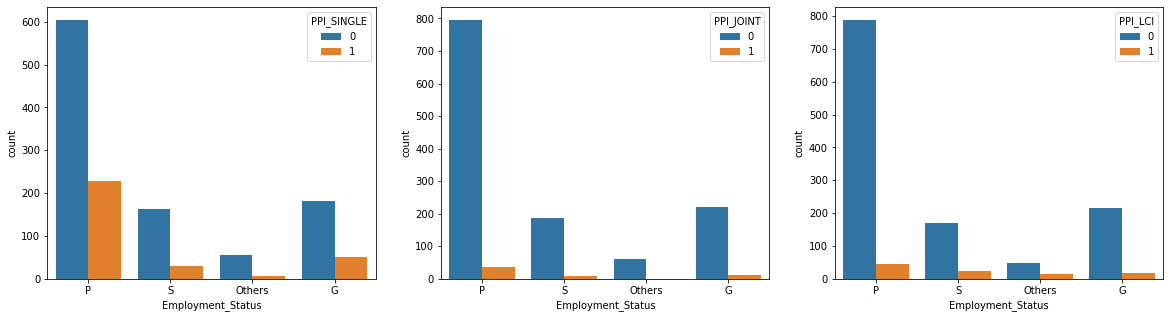

In [815]:
# Analyzing Employment_Status with 'PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI'

plt.figure(figsize = (20, 5))

hue = ['PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI']

for i in enumerate(hue):
    plt.subplot(len(cols)//2, 3, i[0]+1)
    sns.countplot(x ="Employment_Status" , data = df,hue=i[1])
    #plt.xticks(rotation=90)
plt.show()

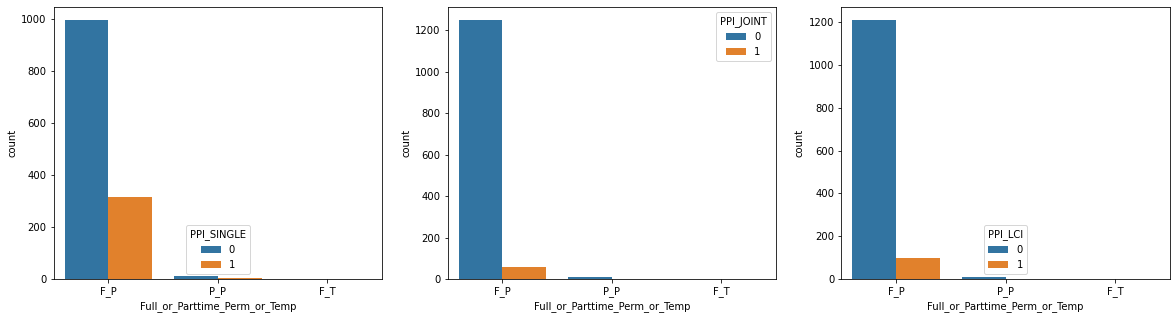

In [816]:
# Analyzing "Full_or_Parttime_&_Perm_or_Temp" with 'PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI'

plt.figure(figsize = (20, 5))

hue = ['PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI']

for i in enumerate(hue):
    plt.subplot(len(cols)//2, 3, i[0]+1)
    sns.countplot(x ="Full_or_Parttime_Perm_or_Temp" , data = df,hue=i[1])
    #plt.xticks(rotation=90)
plt.show()

We can see that Full_or_Parttime_Perm_or_Temp is highly biased with one value and it was the same befoe merging "Full_Part_Time_Empl_Ind" and "Perm_Temp_Empl_Ind columns too. We will drop this column to avoid biased results.

In [817]:
df.drop("Full_or_Parttime_Perm_or_Temp",1,inplace=True)

### Observations on 'Employment_Status','Full_Part_Time_Empl_Ind', 'Perm_Temp_Empl_Ind'

- People with employment status P,S,G can be approached for insurance.
- People with employment status P has high chances of buying insurance.
- SIngle is the preferred insurance type
- Full time permanent employees should be targeted for insurance. They are likey to buy single insurance.

#### ANalyzing 'Current_Account', 'ACCESS_Card','VISA_Card'

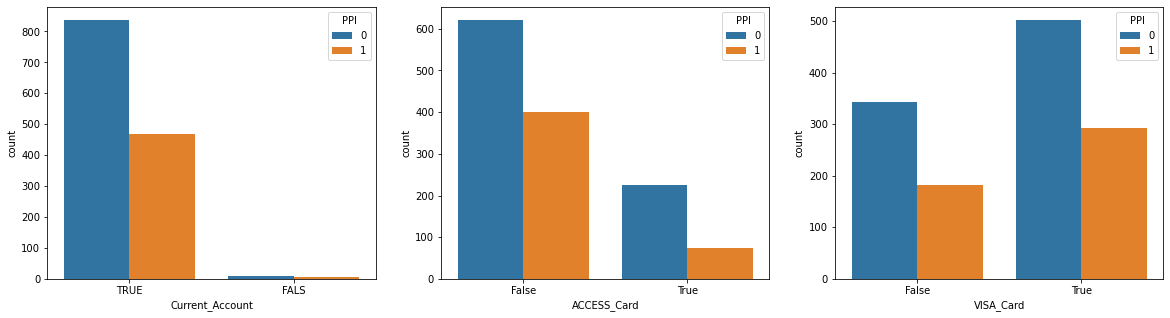

In [818]:
cols = ['Current_Account', 'ACCESS_Card','VISA_Card']

plt.figure(figsize=(20,5))

for i in enumerate(cols):
    plt.subplot(len(cols)//2,3,i[0]+1)
    sns.countplot(x=i[1], data=df, hue=df.PPI);

In [819]:
df.Current_Account.value_counts(normalize=True)

TRUE   0.9887
FALS   0.0113
Name: Current_Account, dtype: float64

In [820]:
# dropping Current_Account to avoid biased results as 99% of the data is True

df.drop("Current_Account",1,inplace=True)

### Observations on 'Current_Account', 'ACCESS_Card','VISA_Card'

- Most of the people with PPIs are current account holders. So we should approach current account holders for insurance.
- And people without access card are highly likely to buy insurance than the people with  access cards.
- And people with or without Visa card can be approached for insurance.


#### Analyzing 'American_Express', 'Diners_Card', 'Cheque_Guarantee'

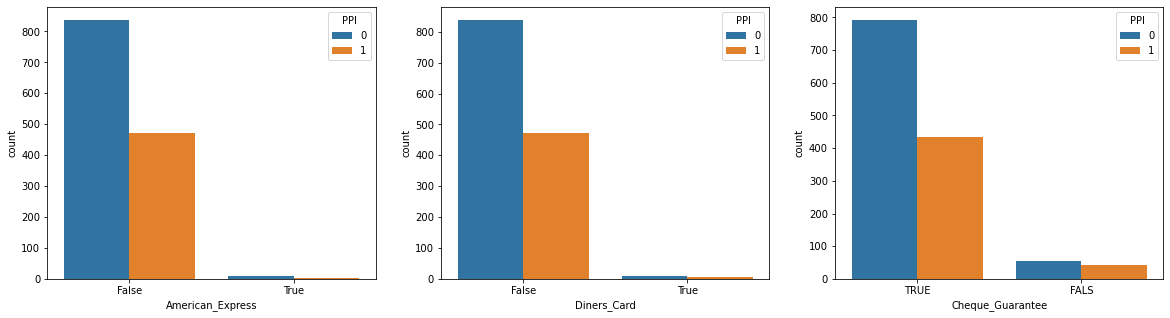

In [821]:
cols = ['American_Express', 'Diners_Card', 'Cheque_Guarantee']

plt.figure(figsize=(20,5))

for i in enumerate(cols):
    plt.subplot(len(cols)//2,3,i[0]+1)
    sns.countplot(x=i[1], data=df, hue=df.PPI);

In [822]:
df.Cheque_Guarantee.value_counts(normalize=True)

TRUE   0.9281
FALS   0.0719
Name: Cheque_Guarantee, dtype: float64

In [823]:
# Since all the three variables are have high percentage for a single value will drop these variables

df.drop(['American_Express', 'Diners_Card', 'Cheque_Guarantee'],1,inplace=True)

### Observations on 'American_Express', 'Diners_Card', 'Cheque_Guarantee'

- Most of the insurance holders doesn't have 'American_Express' or 'Diners_Card'.
- People who presented gurantee cheque can be approached for insurance.

#### Analyzing 'VISA_Card','Other_Credit_Store_Card', 'Payment_Method'

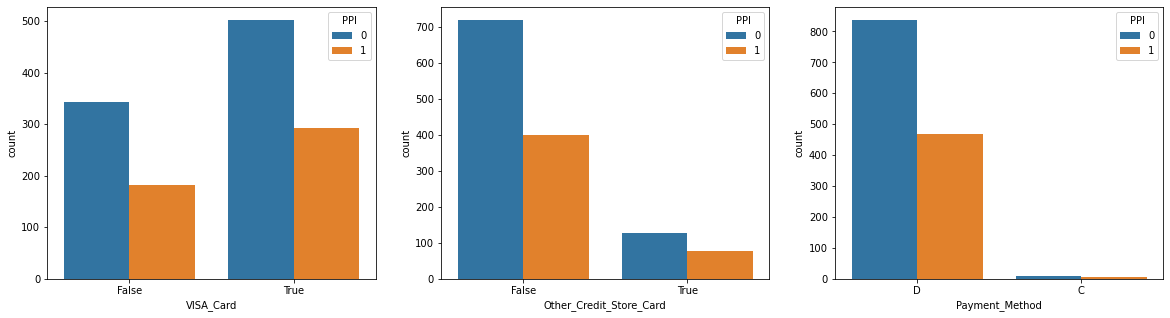

In [824]:
cols = ['VISA_Card','Other_Credit_Store_Card', 'Payment_Method']

plt.figure(figsize=(20,5))

for i in enumerate(cols):
    plt.subplot(len(cols)//2,3,i[0]+1)
    sns.countplot(x=i[1], data=df, hue=df.PPI);

In [825]:
# Since most of the data in Payment_method is D we will drop this variable

df.drop("Payment_Method",1,inplace=True)

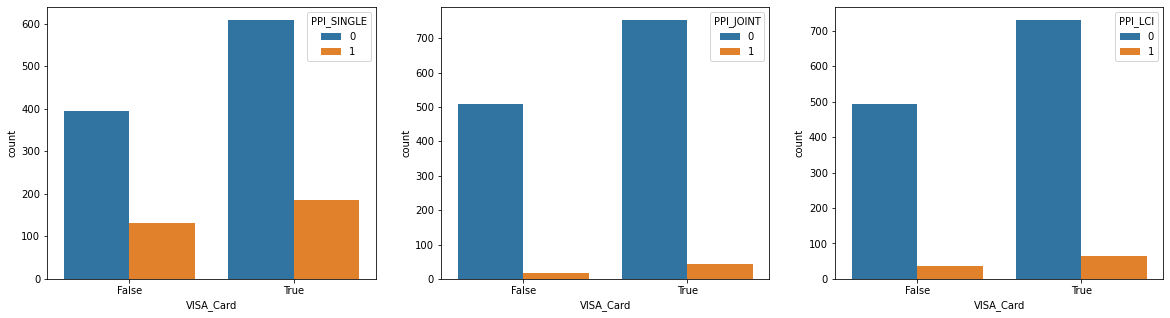

In [826]:
# Analyzing VISA_Card with 'PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI'

plt.figure(figsize = (20, 5))

hue = ['PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI']

for i in enumerate(hue):
    plt.subplot(len(cols)//2, 3, i[0]+1)
    sns.countplot(x ="VISA_Card" , data = df,hue=i[1])
    #plt.xticks(rotation=90)
plt.show()

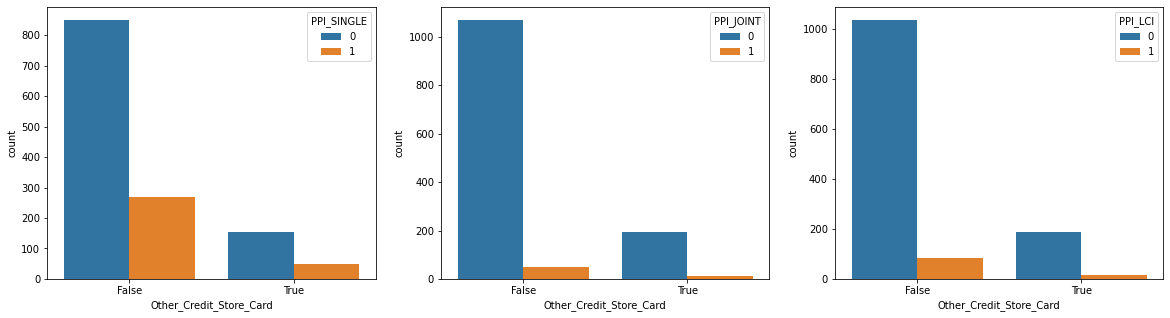

In [827]:
# Analyzing Other_Credit_Store_Card with 'PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI'

plt.figure(figsize = (20, 5))

hue = ['PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI']

for i in enumerate(hue):
    plt.subplot(len(cols)//2, 3, i[0]+1)
    sns.countplot(x ="Other_Credit_Store_Card" , data = df,hue=i[1])
    #plt.xticks(rotation=90)
plt.show()

### Observations on 'VISA_Card','Other_Credit_Store_Card', 'Payment_Method'

- Visa card holders can be approached for joint and LCI
- People with or without visa card can be approached for single insurance
- people without credit store can also be approached for LCI and joint insurance
- payment type will not have any impact in buying insurance

#### Analyzing 'Bankruptcy_Detected__SP_', 'CIFAS_detected'

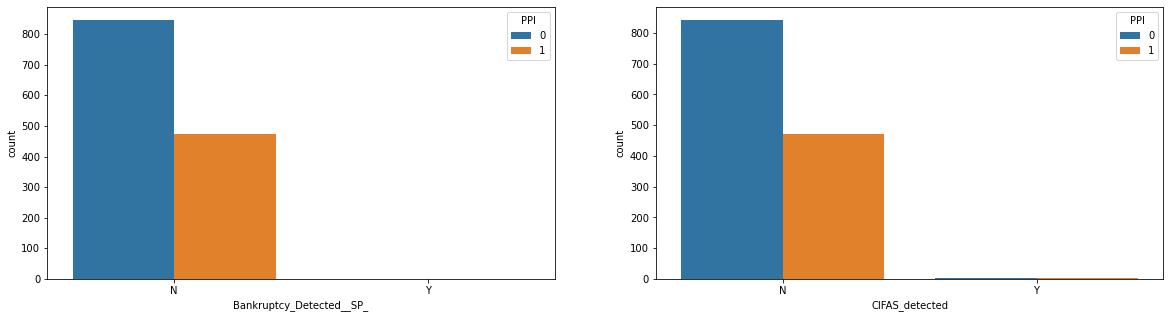

In [828]:
cols = ['Bankruptcy_Detected__SP_', 'CIFAS_detected']

plt.figure(figsize=(20,5))

for i in enumerate(cols):
    plt.subplot(len(cols)//2,2,i[0]+1)
    sns.countplot(x=i[1], data=df, hue=df.PPI);

In [829]:
# Since these variables are highly biased we will drop these variables

df.drop(['Bankruptcy_Detected__SP_', 'CIFAS_detected'],1,inplace=True)

### Observations on 'Bankruptcy_Detected__SP_', 'CIFAS_detected'

- It's quite natural that people who are bankrupt can't afford buying insurance.

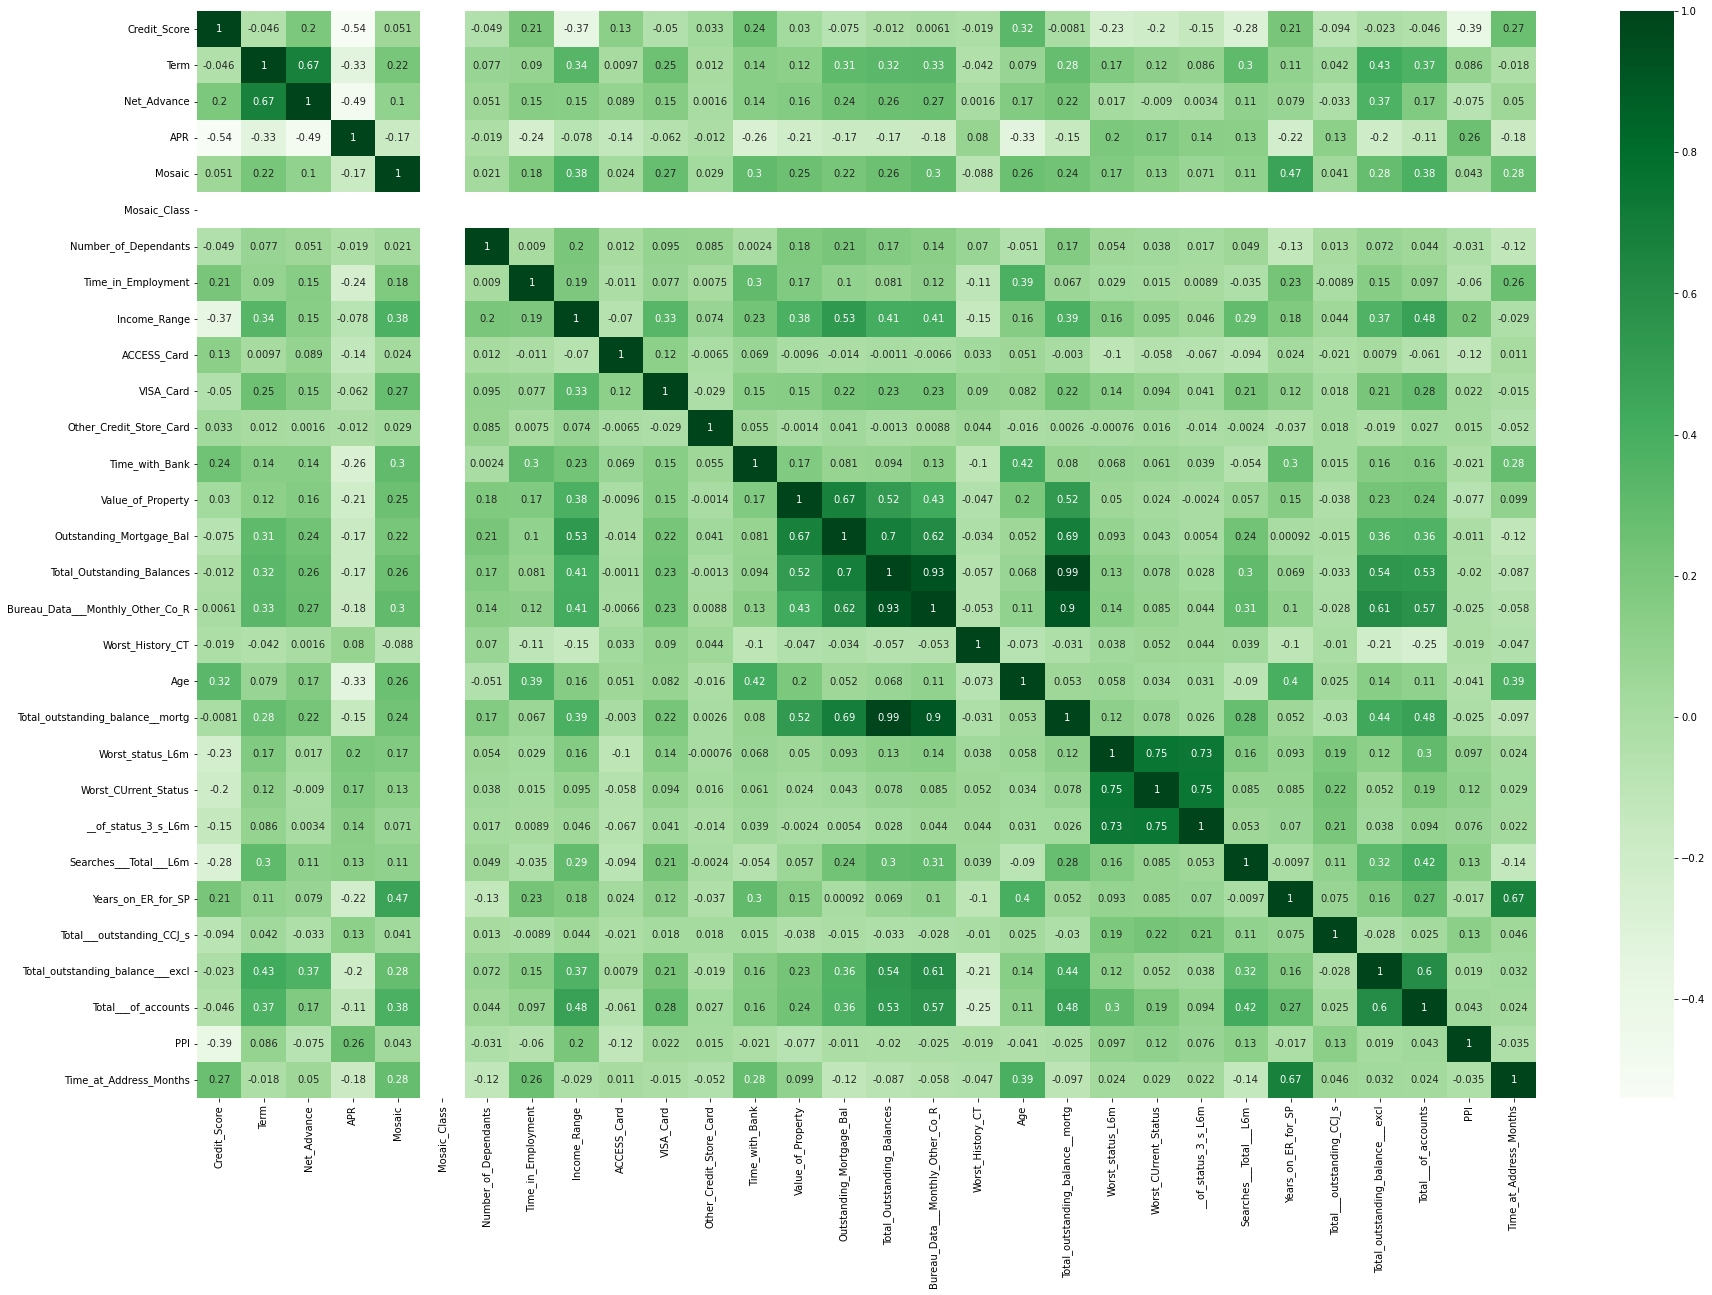

In [830]:
plt.figure(figsize=(30,20))
sns.heatmap(data=df[['Credit_Score', 'Final_Grade', 'Term', 'Net_Advance', 'APR',
       'Loan_Type', 'Mosaic', 'Mosaic_Class',
       'Residential_Status', 'Telephone_Indicator', 'Number_of_Dependants',
       'Marital_Status', 'Gender', 'Time_in_Employment', 'Employment_Status',
        'Income_Range', 'ACCESS_Card', 'VISA_Card',
       'Other_Credit_Store_Card', 'Time_with_Bank', 'Value_of_Property',
       'Outstanding_Mortgage_Bal', 'Total_Outstanding_Balances',
       'Bureau_Data___Monthly_Other_Co_R', 'Worst_History_CT', 'Age',
       'Total_outstanding_balance__mortg', 'Worst_status_L6m',
       'Worst_CUrrent_Status', '__of_status_3_s_L6m', 'Searches___Total___L6m',
       'Years_on_ER_for_SP', 'Total___outstanding_CCJ_s',
       'Total_outstanding_balance___excl', 'Total___of_accounts', 'PPI',
       'Time_at_Address_Months']].corr(),cmap="Greens",annot=True)
plt.show()

#### We can see that Some of the variables are highly correlated. We will drop those variables.


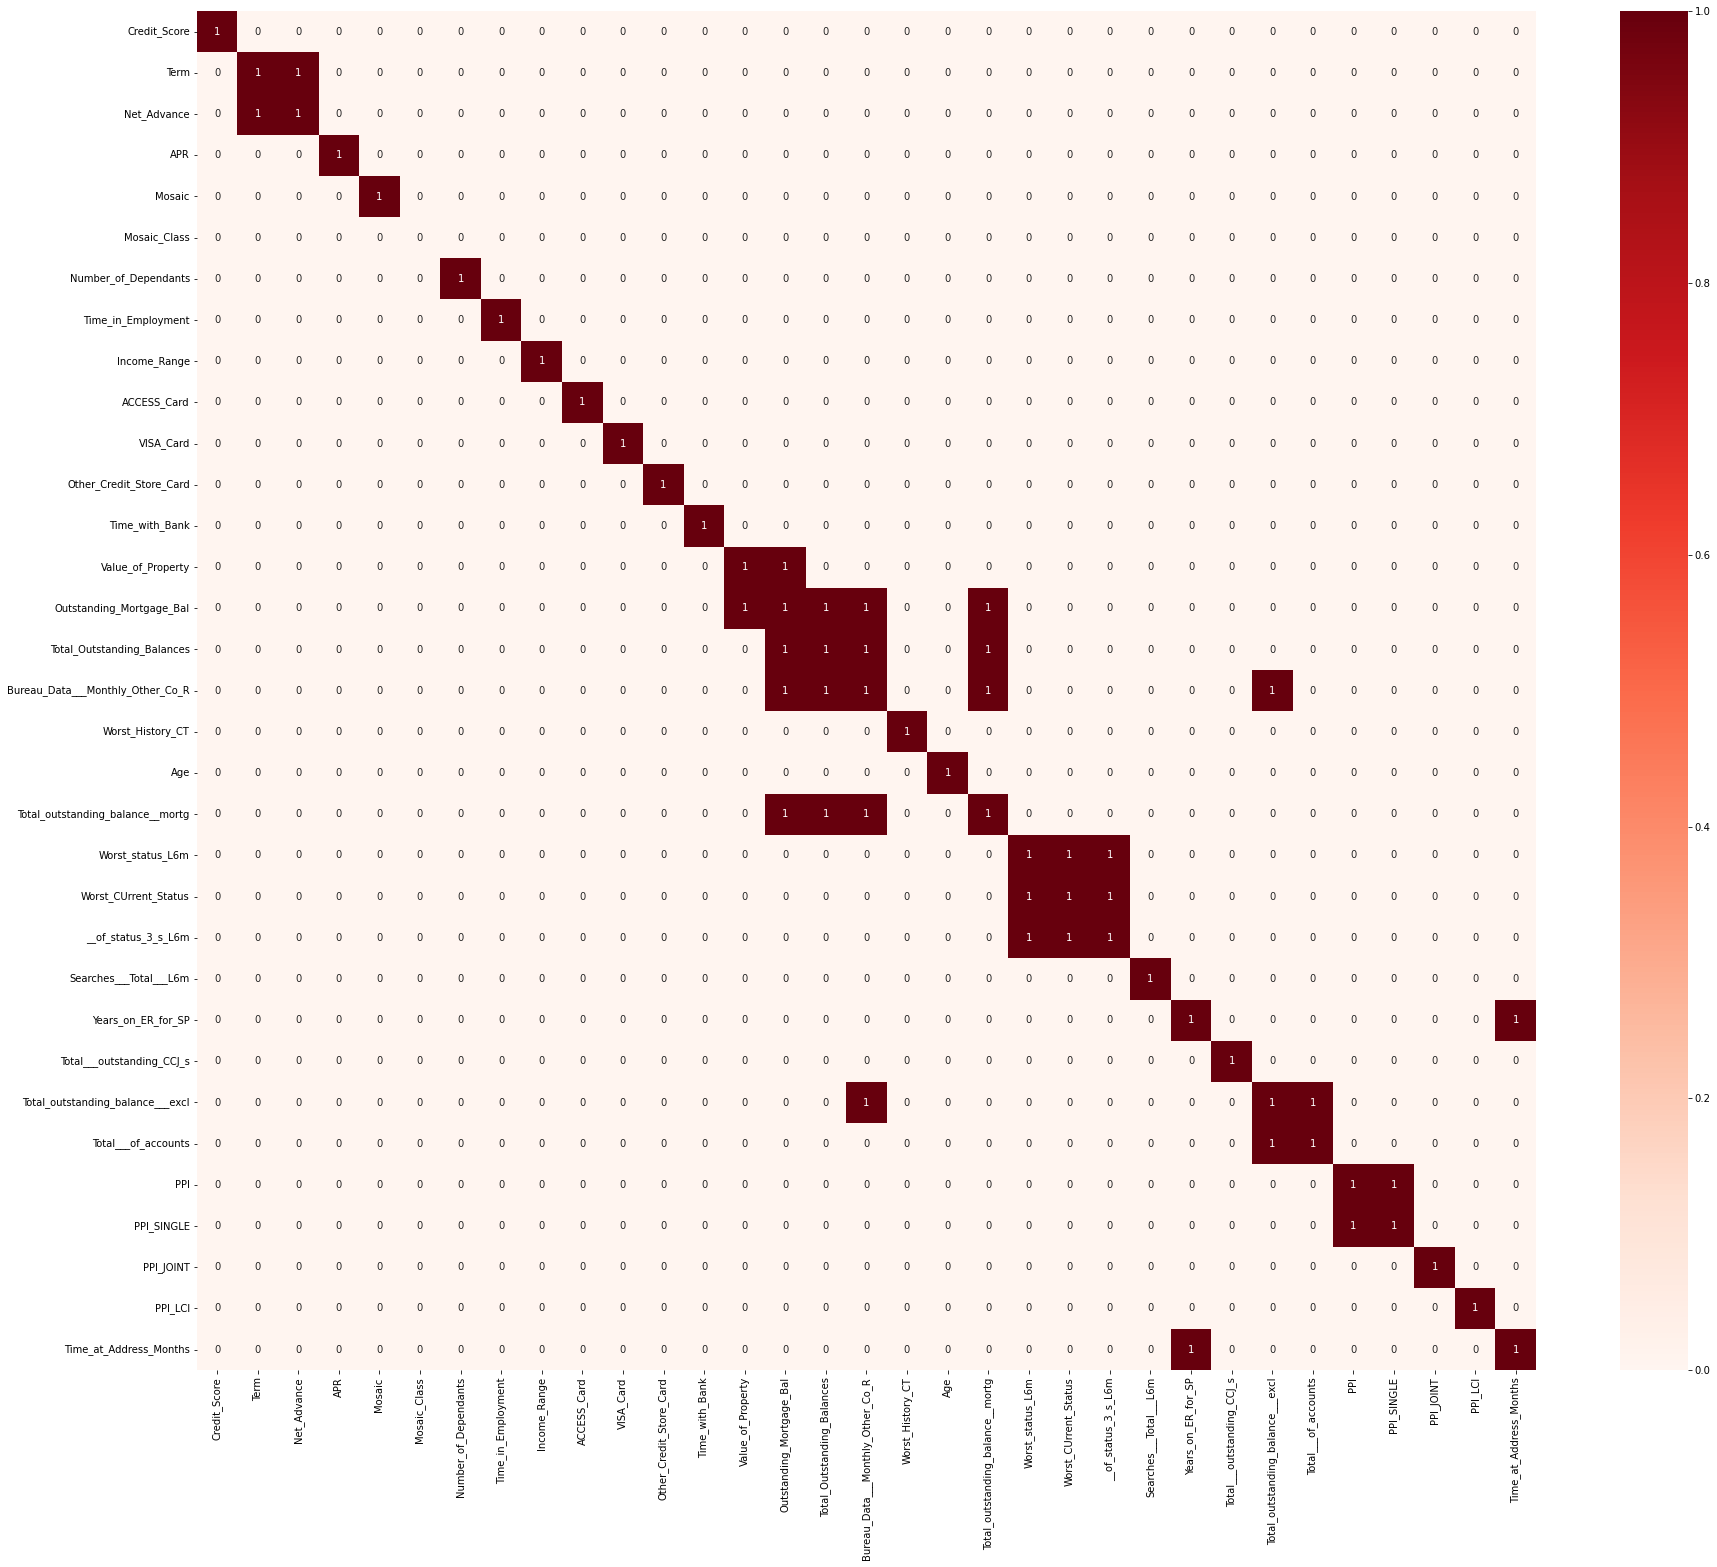

In [831]:
# Highlighting highly correlated variables

plt.figure(figsize=(30,25))
sns.heatmap(data=df[['Credit_Score', 'Final_Grade', 'Term', 'Net_Advance', 'APR',
       'Loan_Type', 'Mosaic', 'Mosaic_Class',
       'Residential_Status', 'Telephone_Indicator', 'Number_of_Dependants',
       'Marital_Status', 'Gender', 'Time_in_Employment', 'Employment_Status',
        'Income_Range', 'ACCESS_Card', 'VISA_Card',
       'Other_Credit_Store_Card', 'Time_with_Bank', 'Value_of_Property',
       'Outstanding_Mortgage_Bal', 'Total_Outstanding_Balances',
       'Bureau_Data___Monthly_Other_Co_R', 'Worst_History_CT', 'Age',
       'Total_outstanding_balance__mortg', 'Worst_status_L6m',
       'Worst_CUrrent_Status', '__of_status_3_s_L6m', 'Searches___Total___L6m',
       'Years_on_ER_for_SP', 'Total___outstanding_CCJ_s',
       'Total_outstanding_balance___excl', 'Total___of_accounts', 'PPI',
       'PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI', 'Credit_Score_bin', 'Termbin',
       'Time_at_Address_Months']].corr(method='pearson')>0.6,cmap="Reds",annot=True)
plt.show()

In [832]:
# Dropping Highly correlated variables

df.drop(["Bureau_Data___Monthly_Other_Co_R","Total_outstanding_balance__mortg","Worst_status_L6m","__of_status_3_s_L6m",
"Outstanding_Mortgage_Bal"],1,inplace=True)

#### Binary encoding for categorical variable with cardinality=2

In [833]:
# Checking the value counts to make sure the words are same in all variables before encoding

var = ["ACCESS_Card","VISA_Card"]

for i in var:
    print(df[i].value_counts(dropna=False), "\n")

False    1022
True      300
Name: ACCESS_Card, dtype: int64 

True     795
False    527
Name: VISA_Card, dtype: int64 



In [834]:
# Binary encoding for "Loan_Type","Telephone_Indicator","Gender" cols

binencode = {"Loan_Type":{"secured":1,"UnSecured":0},
             "Telephone_Indicator":{"Y":1,"N":0},
            "Gender":{"M":1,"F":0}}

df = df.replace(binencode)

In [835]:
# Binary encoding for bool type data

var2 = ["ACCESS_Card","VISA_Card","Other_Credit_Store_Card"]

# Function for binary encoding
for i in var2:
    if df[i].dtype == "bool":
        df[i] = df[i].astype("int")

#### Creating dummy variables

In [836]:
dummies = pd.get_dummies(df[['Final_Grade','Residential_Status','Marital_Status',
                          'Employment_Status']],drop_first=True)

# Concatenating dummies with our original dataset

df = pd.concat([df,dummies],axis=1)


# Dropping the original variables after creating dummy variables
df.drop(['Final_Grade','Residential_Status','Marital_Status',
         'Employment_Status'],axis=1,inplace=True)

#### Dropping binned variables

In [837]:
cols = df.columns

for i in cols:
    if "bin" in i:
        #print(df.drop(["'"+i+"'"],1,inplace=True))
        print("'"+i+"',")

'Credit_Score_bin',
'Termbin',
'Net_Advance_bin',
'APR_bin',
'Time_at_Address_bin',
'Time_in_Employment_bin',
'Time_with_Bank_bin',
'Value_of_Property_bin',
'Outstanding_Mortgage_Bal_bin',
'Total_Outstanding_Balances_bin',
'Total_outstanding_balance__mortg_bin',
'Total_outstanding_balance_excl_bin1',


In [838]:
df.drop(['Credit_Score_bin',
'Termbin',
'Time_at_Address_bin',
'Time_in_Employment_bin',
'Time_with_Bank_bin',
'Outstanding_Mortgage_Bal_bin',
'Total_Outstanding_Balances_bin',
'Total_outstanding_balance__mortg_bin',
'Total_outstanding_balance_excl_bin1','APR_bin','Value_of_Property_bin','Net_Advance_bin'],1,inplace=True)

In [839]:
print("Final Shape:",df.shape)

Final Shape: (1322, 46)


In [840]:
# We have all the data prepared

df.head()

,Credit_Score,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,Telephone_Indicator,Number_of_Dependants,Gender,Time_in_Employment,Income_Range,ACCESS_Card,VISA_Card,Other_Credit_Store_Card,Time_with_Bank,Value_of_Property,Total_Outstanding_Balances,Worst_History_CT,Age,Worst_CUrrent_Status,Searches___Total___L6m,Years_on_ER_for_SP,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,PPI,PPI_SINGLE,PPI_JOINT,PPI_LCI,Time_at_Address_Months,Final_Grade_B,Final_Grade_C,Final_Grade_D,Final_Grade_E,Final_Grade_F,Final_Grade_X,Final_Grade_others,Residential_Status_Others,Residential_Status_T,Marital_Status_Others,Marital_Status_S,Employment_Status_Others,Employment_Status_P,Employment_Status_S
53,991,60,10000.0000,7.4000,0,6,1,157,1,0,1,274,6,1,1,0,178,400000,372884,0,55,0,3,0,0,761,9,1,1,0,0,5.0645,0,0,0,0,0,1,0,0,0,0,0,0,1,0
62,1104,48,16091.4200,12.3000,1,0,1,196,1,0,0,53,0,0,0,0,106,120000,7808,0,30,0,0,0,0,79,2,0,0,0,0,6.3226,1,0,0,0,0,0,0,1,0,0,1,0,1,0
63,789,36,1800.0000,25.9000,0,0,1,44,1,1,0,79,5,0,0,0,79,245000,14251,0,42,0,0,0,0,143,9,0,0,0,0,1.4194,0,0,1,0,0,0,0,0,0,0,0,0,1,0
64,933,48,5808.0000,16.2000,1,0,1,12,0,0,0,36,0,0,0,0,120,120000,1863,5,23,0,4,0,0,19,8,1,1,0,0,0.3871,0,0,0,1,0,0,0,0,1,0,1,0,0,1
77,750,60,3000.0000,36.9000,0,4,1,240,1,0,1,12,2,1,0,0,48,120000,1229,0,21,0,1,0,0,13,2,1,1,0,0,7.7419,0,0,0,0,1,0,0,1,0,0,1,0,1,0


In [841]:
#sns.pairplot(data=df)
#plt.show()

### Checking for data imbalance

In [842]:
sum(df.PPI)/len(df.PPI)

0.3600605143721634

In [843]:
df.columns

Index(['Credit_Score', 'Term', 'Net_Advance', 'APR', 'Loan_Type', 'Mosaic',
       'Mosaic_Class', 'Time_at_Address', 'Telephone_Indicator',
       'Number_of_Dependants', 'Gender', 'Time_in_Employment', 'Income_Range',
       'ACCESS_Card', 'VISA_Card', 'Other_Credit_Store_Card', 'Time_with_Bank',
       'Value_of_Property', 'Total_Outstanding_Balances', 'Worst_History_CT',
       'Age', 'Worst_CUrrent_Status', 'Searches___Total___L6m',
       'Years_on_ER_for_SP', 'Total___outstanding_CCJ_s',
       'Total_outstanding_balance___excl', 'Total___of_accounts', 'PPI',
       'PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI', 'Time_at_Address_Months',
       'Final_Grade_B', 'Final_Grade_C', 'Final_Grade_D', 'Final_Grade_E',
       'Final_Grade_F', 'Final_Grade_X', 'Final_Grade_others',
       'Residential_Status_Others', 'Residential_Status_T',
       'Marital_Status_Others', 'Marital_Status_S', 'Employment_Status_Others',
       'Employment_Status_P', 'Employment_Status_S'],
      dtype='object')

### Splitting the data into test and train

In [844]:
from sklearn.model_selection import train_test_split

In [845]:
X = df.drop(['PPI', 'PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI'],1)
y = df.PPI

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=100)

print("X Train shape:",X_train.shape,"\n")
print("X Test shape:",X_test.shape,"\n")
print("y Train shape:",y_train.shape,"\n")
print("y Test shape:",y_test.shape,"\n")

X Train shape: (1057, 42) 

X Test shape: (265, 42) 

y Train shape: (1057,) 

y Test shape: (265,) 



### Data imbalance treatment using SMOTEENN

In [846]:
from imblearn.combine import SMOTEENN

In [847]:
sme = SMOTEENN(random_state=42)

X_train,y_train = sme.fit_resample(X_train,y_train)

print("X_train resampled shape:",X_train.shape)
print("y_train resampled shape:",y_train.shape) 

X_train resampled shape: (497, 42)
y_train resampled shape: (497,)


In [848]:
# CHecking imbalance rate after SMOTEENN

sum(y_train)/len(y_train)

0.5251509054325956

### Feature scaling using StandardScaler

In [849]:
from sklearn.preprocessing import StandardScaler

In [850]:
scaler = StandardScaler()

In [851]:
# X_resampled = scaler.fit_transform(X_resampled)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Modeling

In [852]:
# Importing Classification models 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [853]:
# define models to test:
base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1))]


kfolds = 5 
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

# Preprocessing, fitting, making predictions and scoring for every model:
for name, model in base_models:
    
    model_steps = Pipeline(steps=[('model', model)])
    
    cv_results = cross_val_score(model_steps, 
                                 X_train, y_train, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)

    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score}")

DT_model cross validation accuarcy score: 0.8049
RF_model cross validation accuarcy score: 0.8914
LR_model cross validation accuarcy score: 0.8129


In [854]:

# Enhanced RF model with the best parameters I found:

rf_model_enh = RandomForestClassifier(n_estimators=160,
                               max_features=0.4,
                               min_samples_split=2,
                               n_jobs=-1,
                               random_state=0)

split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
model_pipe = Pipeline(steps=[('model', rf_model_enh)])
cv_results = cross_val_score(model_pipe, 
                                 X_train, y_train, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
# output:
mean_score = round(np.mean(cv_results), 4)
print(f"Enhanced RF model cross validation accuarcy score on Training data: {mean_score}")


Enhanced RF model cross validation accuarcy score on Training data: 0.8733


In [855]:
cv_results = cross_val_score(model_pipe, 
                                 X_test, y_test, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
# output:
mean_score = round(np.mean(cv_results), 4)
print(f"Enhanced RF model cross validation accuarcy score on Test data: {mean_score}")

Enhanced RF model cross validation accuarcy score on Test data: 0.7132


### Building Random Forest with GridSearchCV

In [856]:
# SPlitting the data again to train and test data set

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)

In [857]:
# Scaling the data

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [858]:
# Initializing Random forest

rf1 = RandomForestClassifier(random_state=42,oob_score=True)


# Parameter dictionary for gridsearch

params = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [4,8,10,20],
    'n_estimators': [50, 100, 125, 150, 200],
    'criterion': ["gini", "entropy"],
    "min_samples_split":[10,20,30,40],
}

#'bootstrap': [True, False],

'''
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
} '''

"\nparams = {\n    'max_depth': [1, 2, 5, 10, 20],\n    'min_samples_leaf': [5, 10, 20, 50, 100],\n    'max_features': [2,3,4],\n    'n_estimators': [10, 30, 50, 100, 200]\n} "

In [859]:
# Instantiate the grid search model

grid_search = GridSearchCV(estimator = rf1,param_grid=params,cv=4,
                           n_jobs=-1,verbose=1,scoring="accuracy")

In [860]:
%%time

grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 3200 candidates, totalling 12800 fits
Wall time: 22min 8s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'max_features': [4, 8, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [10, 20, 30, 40],
                         'n_estimators': [50, 100, 125, 150, 200]},
             scoring='accuracy', verbose=1)

In [861]:
rf1_best = grid_search.best_estimator_
rf1_best

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=20,
                       min_samples_leaf=20, min_samples_split=10,
                       n_estimators=125, oob_score=True, random_state=42)

In [862]:
rf1_best.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=20,
                       min_samples_leaf=20, min_samples_split=10,
                       n_estimators=125, oob_score=True, random_state=42)

In [863]:
def evaluate_model(classifier_rf):
    print("Train Accuracy :", accuracy_score(y_train, classifier_rf.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier_rf.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, classifier_rf.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier_rf.predict(X_test)))

In [864]:
evaluate_model(rf1_best)

Train Accuracy : 0.787027027027027
Train Confusion Matrix:
[[551  50]
 [147 177]]
--------------------------------------------------
Test Accuracy : 0.7229219143576826
Test Confusion Matrix:
[[214  31]
 [ 79  73]]


In [865]:
# CHecking important features

rf1_best.feature_importances_

array([2.96989867e-01, 4.94775695e-02, 6.20699319e-02, 7.90389706e-02,
       2.85176621e-02, 3.31887392e-03, 0.00000000e+00, 1.84033762e-02,
       0.00000000e+00, 5.36027722e-03, 1.33879002e-03, 2.01187641e-02,
       1.71674525e-01, 1.17982844e-03, 2.22729531e-03, 6.93963315e-04,
       1.77987651e-02, 8.49638750e-02, 2.71503867e-02, 5.29533939e-03,
       1.93084851e-02, 2.46290530e-04, 9.63135080e-03, 4.83312854e-03,
       2.00826347e-03, 1.67663232e-02, 1.95726301e-02, 1.86776314e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.73552644e-02, 2.75988020e-03, 2.26034704e-04,
       4.09596884e-03, 3.94484282e-03, 8.22207688e-04, 0.00000000e+00,
       3.52078039e-03, 6.12856484e-04])

In [866]:
# Creating DataFrame for important features

Important_features =  pd.DataFrame({
    "Varname": X.columns,
    "Importance": rf1_best.feature_importances_
})

In [867]:
Important_features.sort_values(by="Importance",ascending=False)

,Varname,Importance
0,Credit_Score,0.2970
12,Income_Range,0.1717
17,Value_of_Property,0.0850
3,APR,0.0790
2,Net_Advance,0.0621
1,Term,0.0495
4,Loan_Type,0.0285
18,Total_Outstanding_Balances,0.0272
11,Time_in_Employment,0.0201
26,Total___of_accounts,0.0196


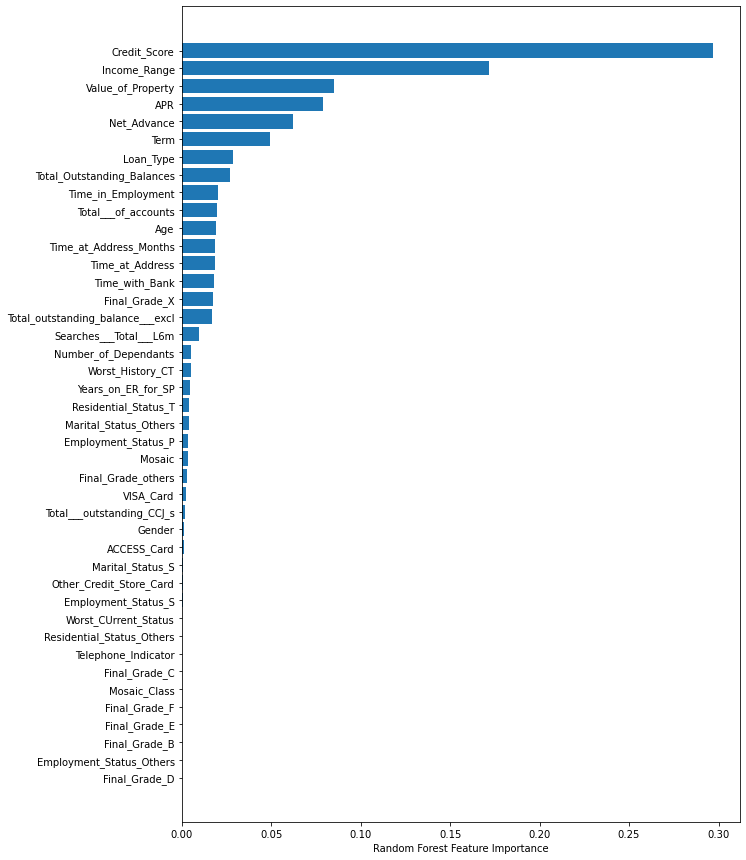

In [868]:
plt.figure(figsize=(10,15))
#plt.barh(X_train.columns,rf1_best.feature_importances_);


sorted_idx = rf1_best.feature_importances_.argsort()
plt.barh(Important_features.Varname[sorted_idx], rf1_best.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

### Checking OOB Score

In [869]:
rf1_best.oob_score_

0.7113513513513513